# Prerequisites

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import scanpy.api as sc
import matplotlib as mpl
from matplotlib import rcParams
import scipy as sci
from scipy.sparse import csr_matrix
import rpy2
import gseapy as gp
print(rpy2.__version__)
sc.settings.verbosity = 3              
sc.logging.print_versions()
import sys

/Users/sophie/miniconda3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


2.9.1
scanpy==1.0.4+92.g9a754bb.dirty anndata==0.5.10 numpy==1.14.2 scipy==1.0.1 pandas==0.22.0 scikit-learn==0.19.1 statsmodels==0.8.0 python-igraph==0.7.1 louvain==0.6.1 


In [ ]:
sc.settings.figdir='./figures/'

In [ ]:
adata_endo_all=sc.write('./data/endo.h5ad')
adata_endo_hvg=sc.write('./data/endo_hvg.h5ad')

# Analysis of healthy islets

In [67]:
ix=np.isin(adata_endo_hvg.obs['treatment'],['Ctrl'])
adata_endo_cd_all=adata_endo_all[ix].copy()
adata_endo_cd_hvg=adata_endo_hvg[ix].copy()

In [35]:
cols_cd=['#a50f15',
 '#f46d43',
 '#fdae61',
 '#aec7e8',
 '#98df8a',
 '#2ca02c',
 '#ff9896',
 '#9467bd',
 '#b15928',
 '#1f78b4']

In [68]:
adata_endo_cd_hvg.uns['groups_named_fine_colors']=cols_cd
adata_endo_cd_all.uns['groups_named_fine_colors']=cols_cd

In [69]:
sc.pp.pca(adata_endo_cd_hvg)
sc.pp.neighbors(adata_endo_cd_hvg)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:07.04) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix


In [ ]:
### positions to initialize UMAP calculation
pos_cd=np.array([[-6.8691037843, -3.3175023824],
       [-6.005226938 , -0.8610376029],
       [-2.0661997735, -0],
       [-4.9481116661,  1.7610011512],
       #[ 0,  1.9],
       [-0.5, 5.9],
       [10.1631199571,  3.4228599671],
       [ 7.951153206 ,  1.2951546357],
       [ 6.9991351026,  5.0314498193],
       [ 6.0593712466,  2.7509562329],
       [ 1.5301080788,  8.9667552257]])

pos=np.array([[-6.8691037843, -3.3175023824],
       [-6.005226938 , -0.8610376029],
       [-2.0661997735, -0],
       [-4.9481116661,  1.7610011512],
       [ 0,  1.9],
       [-0.5, 5.9],
       [10.1631199571,  3.4228599671],
       [ 7.951153206 ,  1.2951546357],
       [ 6.9991351026,  5.0314498193],
       [ 6.0593712466,  2.7509562329],
       [ 1.5301080788,  8.9667552257]])

In [ ]:
sc.tl.paga(adata_endo_cd_hvg,groups='groups_named_fine')
sc.pl.paga(adata_endo_cd_hvg,pos=pos_cd,frameon=False)
sc.tl.umap(adata_endo_cd_hvg,init_pos='paga',min_dist=0.8)


In [72]:
adata_endo_cd_all.obsm['X_umap']=adata_endo_cd_hvg.obsm['X_umap']

## Plots for paper

saving figure to file /Users/sophie/Documents/ICB/Projects/2018_10X_Glp_Est_Mice/Analysis_vers_1_0/final_figures_paper/umapumap_Ctrl_endo_groups.pdf


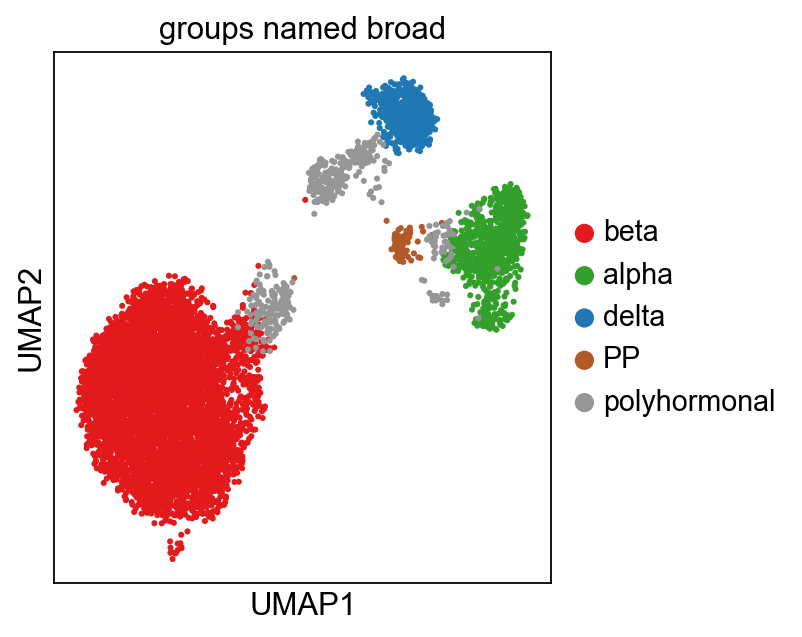

saving figure to file /Users/sophie/Documents/ICB/Projects/2018_10X_Glp_Est_Mice/Analysis_vers_1_0/final_figures_paper/umapumap_Ctrl.pdf


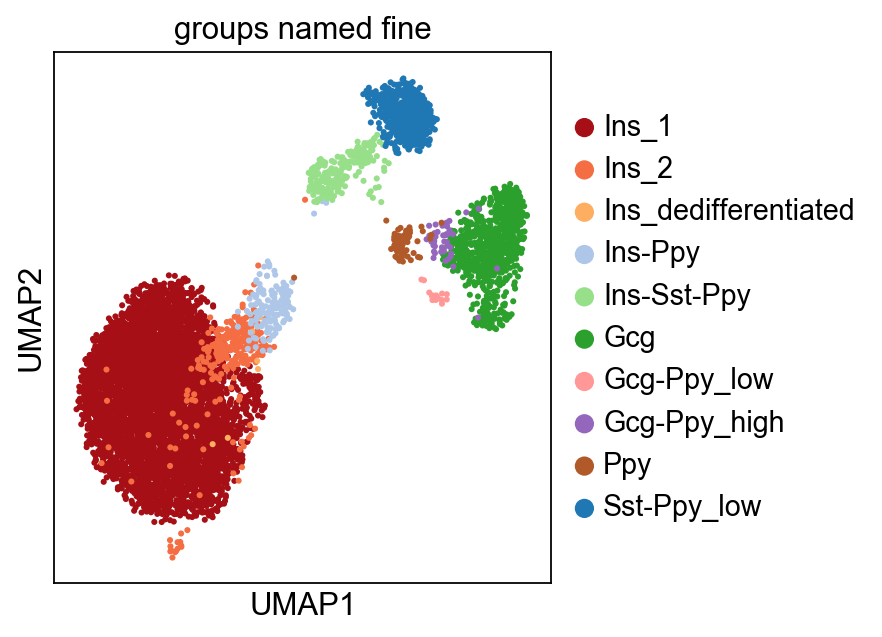

In [180]:
sc.set_figure_params(vector_friendly=True,color_map='RdBu_r',dpi_save=300,transparent=True)
sc.pl.umap(adata_endo_cd_hvg,color=['groups_named_broad'],size=30,save='umap_Ctrl_endo_groups.pdf')
sc.pl.umap(adata_endo_cd_hvg,color=['groups_named_fine'],size=30,save='umap_Ctrl.pdf')

saving figure to file /Users/sophie/Documents/ICB/Projects/2018_10X_Glp_Est_Mice/Analysis_vers_1_0/final_figures_paper/umapCtrl_endo_Ins1.pdf


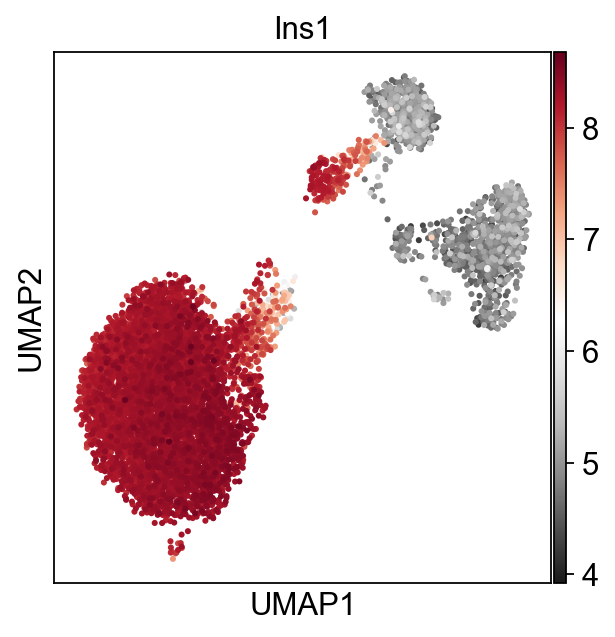

saving figure to file /Users/sophie/Documents/ICB/Projects/2018_10X_Glp_Est_Mice/Analysis_vers_1_0/final_figures_paper/umapCtrl_endo_Gcg.pdf


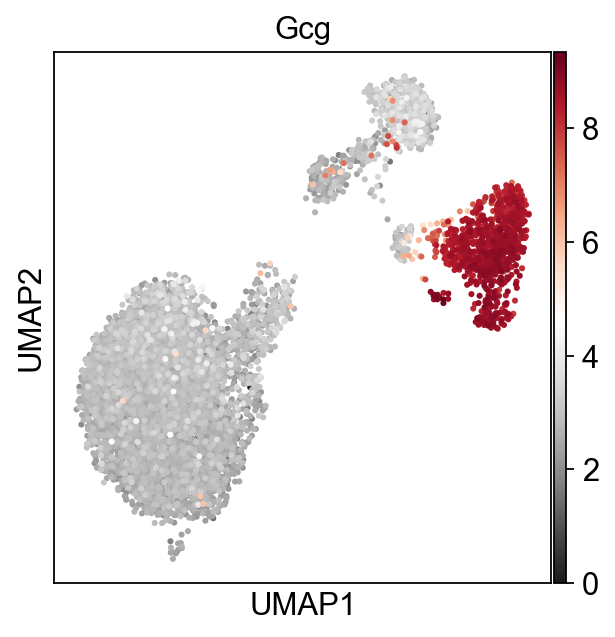

saving figure to file /Users/sophie/Documents/ICB/Projects/2018_10X_Glp_Est_Mice/Analysis_vers_1_0/final_figures_paper/umapCtrl_endo_Sst.pdf


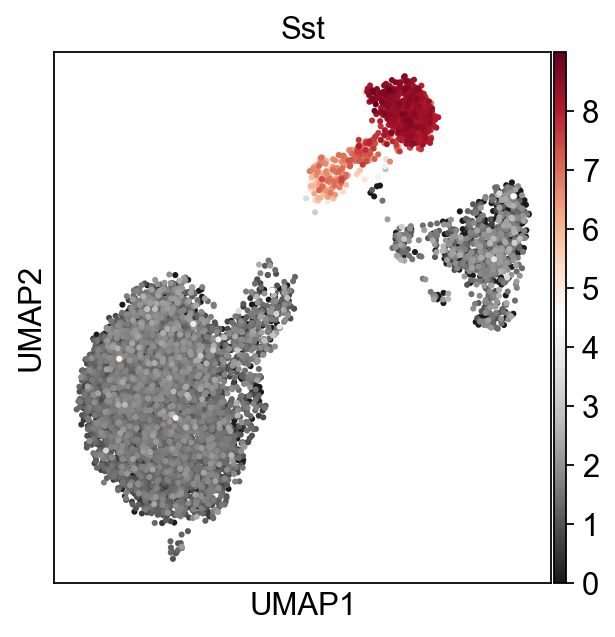

saving figure to file /Users/sophie/Documents/ICB/Projects/2018_10X_Glp_Est_Mice/Analysis_vers_1_0/final_figures_paper/umapCtrl_endo_Ppy.pdf


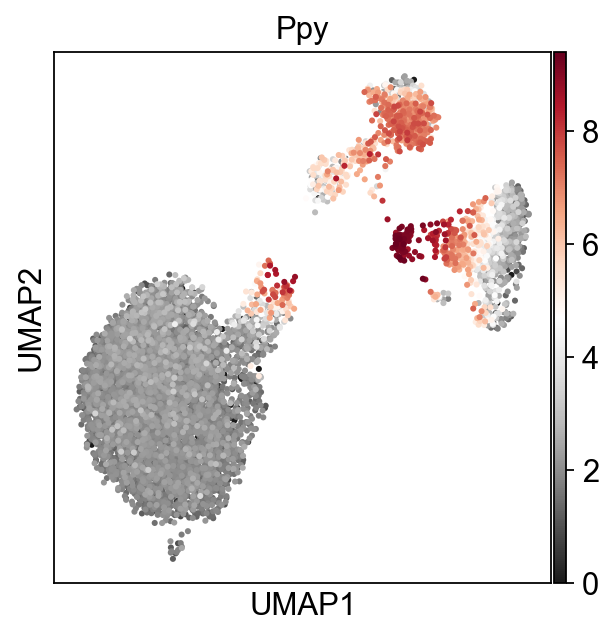

In [188]:
sc.pl.umap(adata_endo_cd_all,color=['Ins1'],size=30,color_map='RdGy_r',save='Ctrl_endo_Ins1.pdf')
sc.pl.umap(adata_endo_cd_all,color=['Gcg'],size=30,color_map='RdGy_r',save='Ctrl_endo_Gcg.pdf')
sc.pl.umap(adata_endo_cd_all,color=['Sst'],size=30,color_map='RdGy_r',save='Ctrl_endo_Sst.pdf')
sc.pl.umap(adata_endo_cd_all,color=['Ppy'],size=30,color_map='RdGy_r',save='Ctrl_endo_Ppy.pdf')

## Gene signatures endocrine cells

In [571]:
adata_test=adata_endo_all[np.isin(adata_endo_all.obs['groups_named_broad'],['beta', 'alpha', 'delta', 'PP'])].copy()
adata_test=adata_test[np.isin(adata_test.obs['treatment'],['Ctrl'])].copy()

In [ ]:
sc.tl.rank_genes_groups(adata_test,method='wilcoxon',n_genes=500,groupby='groups_named_broad',use_raw=False)

x=[]
y=[]

for i in adata_test.obs['groups_named_broad'].cat.categories:
    group=i
    print(group)
    ix_score=adata_test.uns['rank_genes_groups']['scores'][group]>8

    try:
        if sum(ix_score)>300:
            x.extend(list(adata_test.uns['rank_genes_groups']['names'][group][ix_score][0:299]))
            y.extend(list(adata_test.uns['rank_genes_groups']['scores'][group][ix_score][0:299]))
        else:
            x.extend(list(adata_test.uns['rank_genes_groups']['names'][group][ix_score]))
            y.extend(list(adata_test.uns['rank_genes_groups']['scores'][group][ix_score]))
    except ValueError:
        print ('no significant marker genes..')
        pass
x_df=pd.DataFrame(x)

uni=x_df[0].value_counts()[x_df[0].value_counts()==1]
x_unique=uni.index
writer = pd.ExcelWriter('.Normalized_Marker_genes_Ctrl_unique_new.xlsx', engine='xlsxwriter')
for i in adata_test.obs['groups_named_broad'].cat.categories: 
    
    x_all=[]
    y_all=[]

    group=i
    print(group)
    ix_score=adata_test.uns['rank_genes_groups']['scores'][group]>8
    
    genes_top=adata_test.uns['rank_genes_groups']['names'][group][ix_score][0:299]
    scores_top=adata_test.uns['rank_genes_groups']['scores'][group][ix_score][0:299]
    
    
    ix_unique=np.isin(genes_top,list(x_unique))
    try:
        x_all.extend(list(genes_top[ix_unique]))
        y_all.extend(list(scores_top[ix_unique]))

        
        df_all=pd.DataFrame(list(zip(x_all,y_all)),columns=['gene','score'])
        df_all.to_excel(writer,sheet_name=group)
        
    
    except ValueError:
        print ('no significant marker genes..')
        pass       
from collections import OrderedDict
writer.save()


## Trajectory inference of beta cell maturation

In [180]:
adata_beta_cd_hvg=adata_endo_cd_hvg[np.isin(adata_endo_cd_hvg.obs['groups_named_fine'],
                                                        ['Ins_1','Ins_2'])].copy()

In [468]:
adata_beta_cd_all=adata_endo_cd_all[np.isin(adata_endo_cd_all.obs['groups_named_fine'],
                                                        ['Ins_1','Ins_2'])].copy()

In [206]:
adata_beta_cd_hvg.uns['iroot'] = np.flatnonzero(np.array([all(tup) for tup in 
                                                       zip(adata_beta_cd_hvg.obs['groups_named_fine'] == 'Ins_2',
                                                           (adata_beta_cd_hvg[:,'Mafb'].X>1.5))]))[1]
sc.tl.dpt(adata_beta_cd_hvg)

performing Diffusion Pseudotime analysis
    eigenvalues of transition matrix
    [1.         0.9277489  0.9252687  0.92199314 0.9170273  0.9138654
     0.8926283  0.879968   0.83206326 0.8284848 ]
    finished (0:00:00.12) --> added
    'dpt_pseudotime', the pseudotime (adata.obs)


In [207]:
adata_beta_cd_all.obs['dpt_pseudotime']=adata_beta_cd_hvg.obs['dpt_pseudotime']

In [208]:
gene_names=['Ins1','Ins2','Ucn3', 'Trpm5','Ero1lb',
            'G6pc2','Sytl4','Slc2a2',
            'Pdx1','Nkx6-1','Neurod1','Tmem27','Mafb',
            'Chga','Chgb','Pcsk2', 'Pam', 'Iapp', 'Clu', 'Pdia3', 'Dnajb9','Rbp4']

exclude cycling cells

In [209]:
adata_beta_cd_hvg_nocycle=adata_beta_cd_hvg[np.isin(adata_beta_cd_hvg.obs['proliferation_man'],
                                                        ['Non-Cycling'])].copy()

In [210]:
adata_sub_scale=adata_beta_cd_all.copy()
adata_sub_scale=adata_sub_scale[np.isin(adata_sub_scale.obs['proliferation_man'],
                                                        ['Non-Cycling'])].copy()
adata_show=adata_sub_scale[:,np.isin(adata_sub_scale.var_names,gene_names)].copy()


downsampling of beta 1 population (for visualization)

In [211]:
x_samp=adata_show.obs_names[np.isin(adata_show.obs['groups_named_fine'],['Ins_1'])]
x_samp=np.random.choice(x_samp,1000,replace=False)

In [212]:
x_obs=list(x_samp)+list(adata_show.obs_names[np.isin(adata_show.obs['groups_named_fine'],['Ins_2'])])

In [213]:
adata_show=adata_show[x_obs].copy()

In [214]:
adata_show.uns['groups_named_fine_colors']=adata_endo_hvg.uns['groups_named_fine_colors']

In [215]:
adata_show.obs['dpt_pseudotime']=(adata_show.obs['dpt_pseudotime'].values)#-(adata_show.obs['dpt_pseudotime'].values)

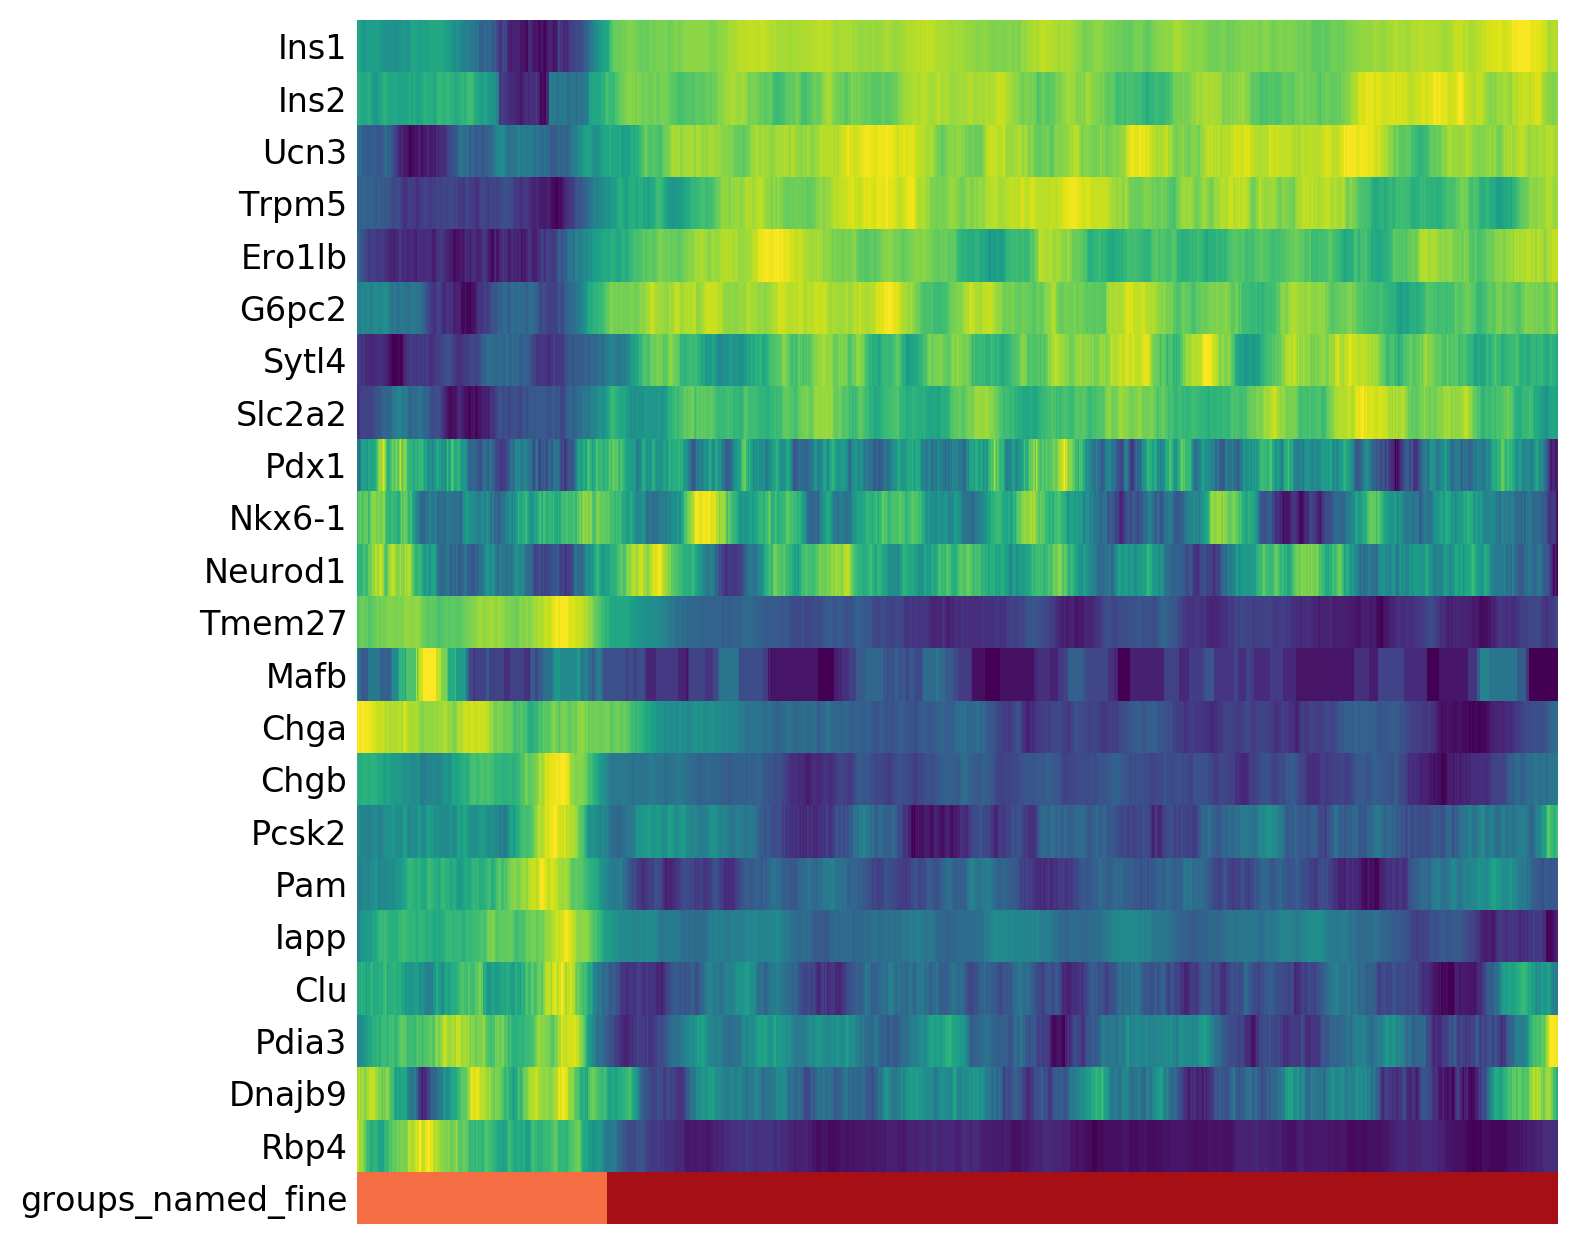

In [217]:
paths = [('groups_named_fine', ['Ins_2','Ins_1'])]
rcParams['figure.figsize'] = (10, 8)

rcParams['figure.subplot.top'] = 0.85
rcParams['figure.subplot.bottom'] = 0.13
for ipath, (descr, path) in enumerate(paths):
    ax = sc.pl.paga_path(adata_show, left_margin=0.3,color_map='viridis',groups_key='groups_named_fine',show_node_names=False,show_colorbar=False,
                         show_yticks=True,
                         annotations=[],
                        #color_maps_annotations={'groups_named_fine':'Paired'},
                        nodes=path,
                        ytick_fontsize=12,
                        keys=gene_names,
                        n_avg=50,
                        title='',
                        normalize_to_zero_one=True, show=False)
pl.savefig('.//figures/S1_Ctrl_beta_pseudotime.pdf',dpi=300,format='pdf')
pl.show()

pl.rcParams.update(pl.rcParamsDefault)


## Gene expression profiles of cycling cells

In [ ]:
df=adata_cd_all.obs
x=pd.DataFrame(df.groupby(['proliferation_man','groups_named_fine'])['proliferation_man'].size().unstack().fillna(0)).transform(lambda x: x/sum(x))
x

/Users/sophie/miniconda3/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


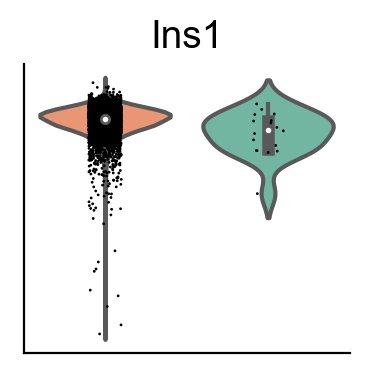

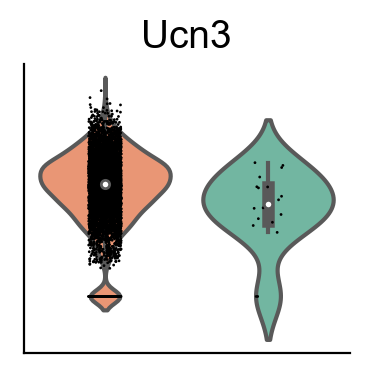

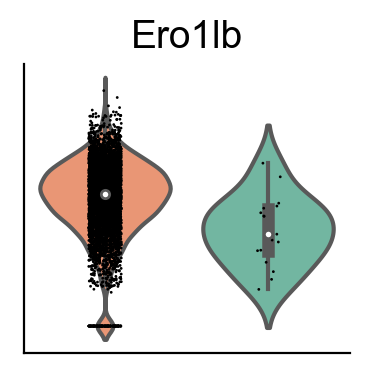

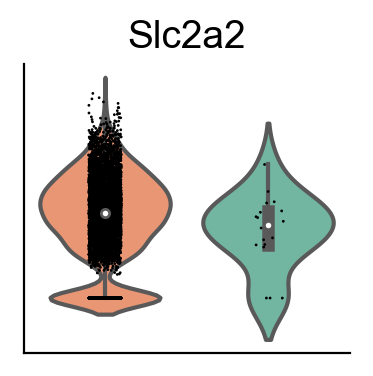

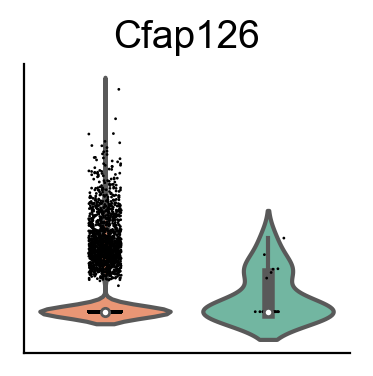

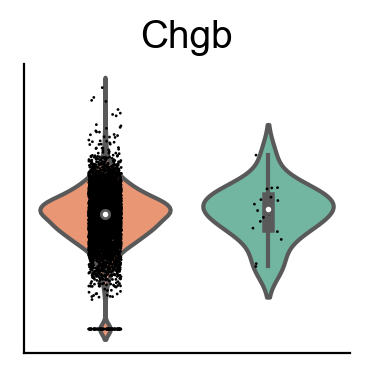

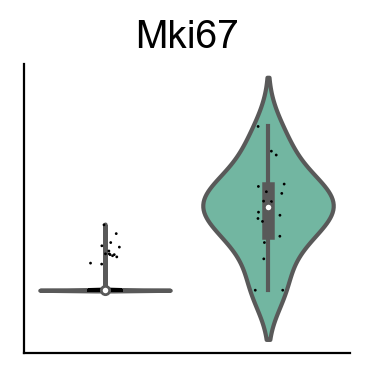

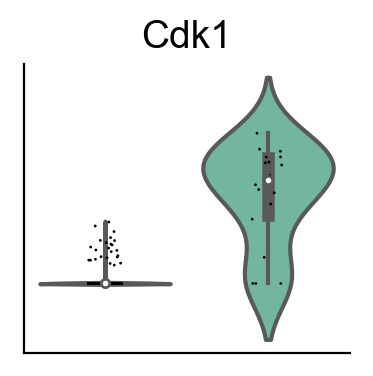

In [476]:
cols=['#fc8d62','#66c2a5']
gene_names=['Ins1','Ucn3','Ero1lb','Slc2a2','Cfap126','Chgb','Mki67','Cdk1']
csfont = {'fontname':'Arial'}

import seaborn as sns
rcParams['figure.figsize'] = (2, 2)
adata=adata_beta_cd_all.copy()
for i,gene in enumerate(gene_names):
        _, axs = pl.subplots()

        obs_df = adata.obs
        X_col = pd.DataFrame({gene:np.array(adata[:, gene].X)},index=obs_df.index)

        obs_df = pd.concat([obs_df, X_col],axis=1)


        sns.stripplot(x='proliferation_man', y=gene, data=obs_df, ax=axs,jitter=1,color='black',size=1)
        sns.violinplot(x='proliferation_man', y=gene, data=obs_df, scale='width',ax=axs,palette=cols,inner='box',linewidth=1.5)
        
        axs.set_xticklabels([],fontsize=12,rotation=0)
        axs.xaxis.set_tick_params(bottom='on', top='off')
        axs.yaxis.set_tick_params(left='on', right='off')    

        axs.set_xticks([])
        axs.get_yaxis().set_ticks([])
        axs.set_xlabel('')
        axs.set_ylabel('')
        axs.set_title(gene,size=14,**csfont)
        axs.xaxis.set_tick_params(bottom='on', top='off')
        axs.yaxis.set_tick_params(left='on', right='off')    
        axs.spines['top'].set_visible(False)
        axs.spines['right'].set_visible(False)
        axs.spines['bottom'].set_visible(True)
        axs.spines['left'].set_visible(True)
        
        


        
        
        pl.gcf().subplots_adjust(bottom=0.2)
        pl.tight_layout()
        pl.savefig('./figures/Fig1_cycling'+gene+'.pdf',format='pdf',dpi=300)
        pl.show()
pl.rcParams.update(pl.rcParamsDefault)
   


# Analysis of mSTZ islets

In [227]:
ix=np.isin(adata_endo_all.obs['treatment'],['Ctrl','Vehicle-STZ'])
adata_endo_cd_stz_all=adata_endo_all[ix].copy()
adata_endo_cd_stz_hvg=adata_endo_hvg[ix].copy()

In [228]:
adata_endo_cd_stz_hvg.uns['groups_named_broad_cond_colors']=['#e31a1c','#fb9a99','#33a02c','#b2df8a','#1f78b4','#a6cee3','#b15928','#dfc27d',
                                                '#525252','#bdbdbd']

In [229]:
sc.pp.pca(adata_endo_cd_stz_hvg)
sc.pp.neighbors(adata_endo_cd_stz_hvg)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:05.80) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix


In [ ]:
sc.tl.paga(adata_endo_cd_stz_hvg,groups='groups_named_fine')
sc.pl.paga(adata_endo_cd_stz_hvg,pos=pos)
sc.tl.umap(adata_endo_cd_stz_hvg,min_dist=0.9,init_pos='paga')

## UMAP plots

saving figure to file /Users/sophie/Documents/ICB/Projects/2018_10X_Glp_Est_Mice/Analysis_vers_1_0/final_figures_paper/umap_broad_cd_stz.pdf


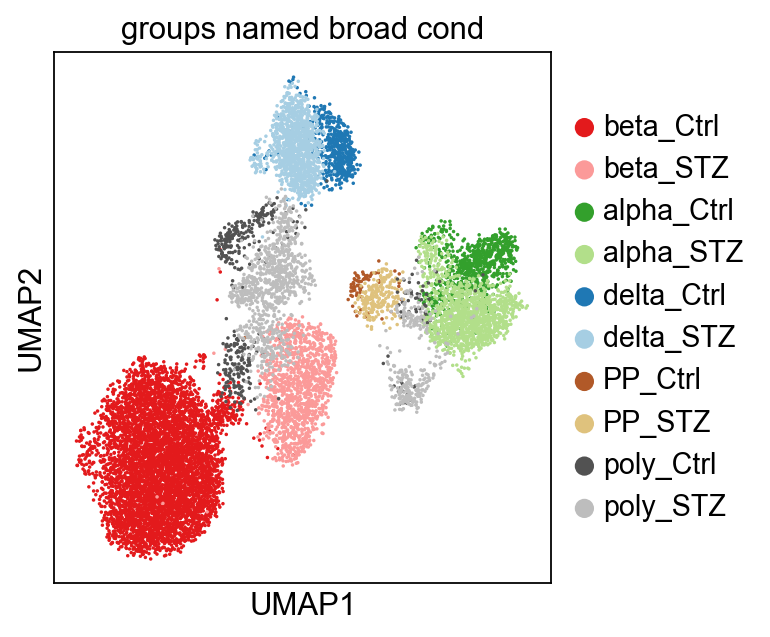

In [257]:
sc.set_figure_params(vector_friendly=True,color_map='viridis',dpi_save=600,transparent=True)
sc.pl.umap(adata_endo_cd_stz_hvg,color=['groups_named_broad_cond'],size=10,save='_broad_cd_stz.pdf')

## Frequencies

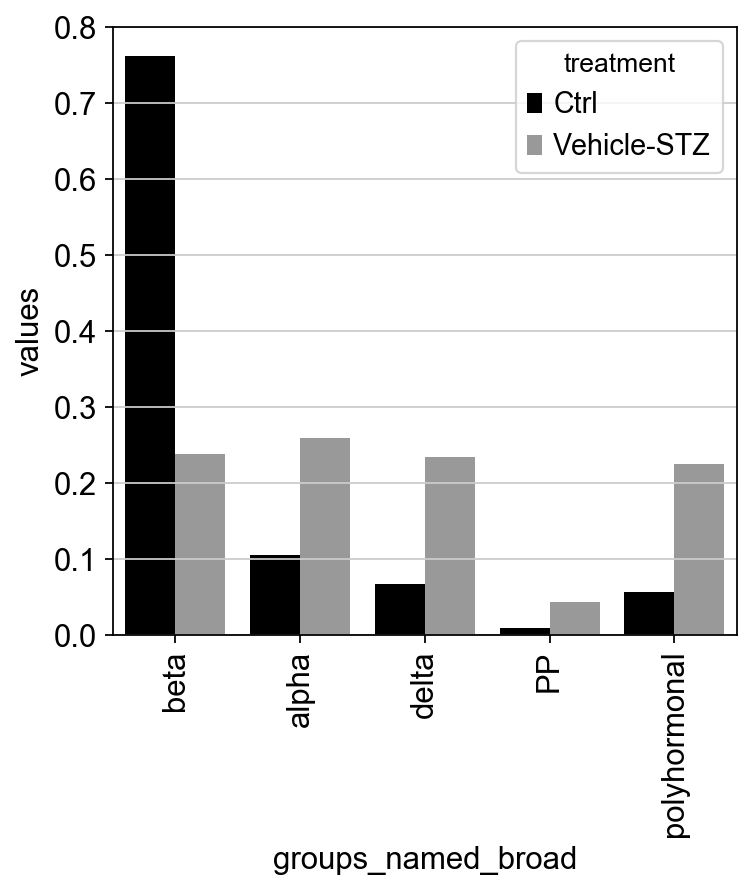

In [260]:
import seaborn as sns
group='groups_named_broad'
df=pd.crosstab(columns=adata_endo_cd_stz_hvg.obs[group],index=adata_endo_cd_stz_hvg.obs['treatment'],normalize='index')
df=df.unstack().reset_index()
df=pd.DataFrame(df.values,columns=[group,'treatment','values'])
#df.columns(['louvain_groups','groups','values'])
rcParams['figure.figsize'] = (5, 5)

ax = sns.barplot(x=group,y='values', hue="treatment", data=df,order=['beta', 'alpha', 'delta', 'PP','polyhormonal'],
                    palette=adata_endo_cd_stz_hvg.uns['treatment_colors'])

pl.xticks(rotation=90)
pl.show()



## Violin plots of beta cell maturation, development, disallowed and dedifferentiation markers

/Users/sophie/miniconda3/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


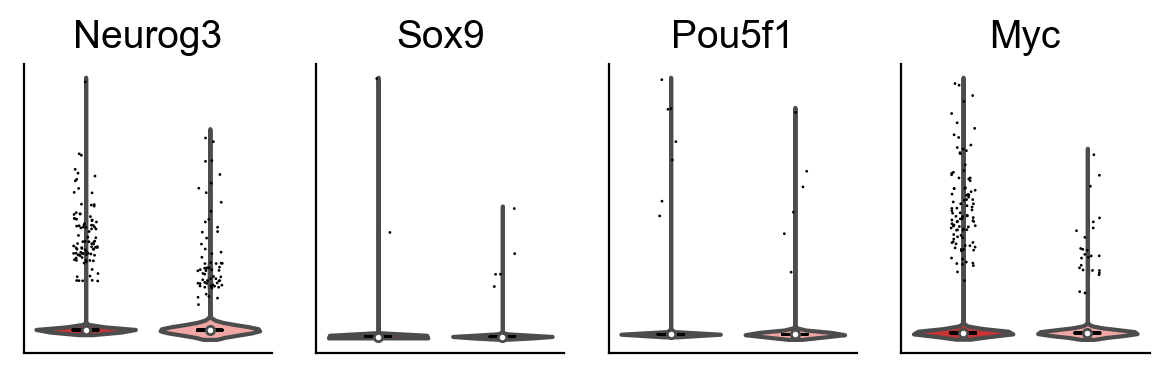

In [321]:
cols_treat=['#e31a1c','#fb9a99']#adata_endo_all.uns['treatment_colors'][0:2]
gene_names=['Sox9','Pou5f1', 'Neurog3','Myc',
           'Ins1','Ins2','Slc2a2','Ucn3','Pdx1','Nkx6-1','Foxo1','Mafb',
           'Gast','Cck','Slc5a10','Cd200','Ptger3','Scarf2','Dcdc2a','Rbp4','Aldob','Chgb',
           'Hk1','Ldha','Slc16a1','Galm','Acot7','Pdgfra',
           'Insr','Igf1r','Glp1r']


genes=[ 'Neurog3','Sox9','Pou5f1','Myc']
csfont = {'fontname':'Arial'}

import seaborn as sns
rcParams['figure.figsize'] = (6, 2)
fig,axs=pl.subplots(ncols=len(genes))
adata=adata_endo_cd_stz_all[np.isin(adata_endo_cd_stz_all.obs['groups_named_broad'],'beta')].copy()
for i,gene in enumerate(genes):
        

        obs_df = adata.obs
        X_col = pd.DataFrame({gene:np.array(adata[:, gene].X)},index=obs_df.index)

        obs_df = pd.concat([obs_df, X_col],axis=1)


        sns.stripplot(x='treatment', y=gene, data=obs_df, ax=axs[i],jitter=1,color='black',size=1)
        #obs_df[gene] = X_col
        sns.violinplot(x='treatment', y=gene, data=obs_df, scale='width',ax=axs[i],palette=cols_treat,inner='box',linewidth=1.5)
        #ax.legend_.remove()
        
        axs[i].set_xticklabels([],fontsize=12,rotation=0)
        axs[i].xaxis.set_tick_params(bottom='on', top='off')
        axs[i].yaxis.set_tick_params(left='on', right='off')    

        axs[i].set_xticks([])
        axs[i].get_yaxis().set_ticks([])
        axs[i].set_xlabel('')
        axs[i].set_ylabel('')
        axs[i].set_title(gene,size=14,**csfont)
        axs[i].xaxis.set_tick_params(bottom='on', top='off')
        axs[i].yaxis.set_tick_params(left='on', right='off')    
        axs[i].spines['top'].set_visible(False)
        axs[i].spines['right'].set_visible(False)
        axs[i].spines['bottom'].set_visible(True)
        axs[i].spines['left'].set_visible(True)
        
        


        
        
pl.gcf().subplots_adjust(bottom=0.2)
pl.tight_layout()
pl.savefig('./figures/violin_cd_stz_beta_embryonic.pdf',format='pdf',dpi=300)
pl.show()
pl.rcParams.update(pl.rcParamsDefault)
   


## Identification of specific dedifferentiation markers

In [259]:
from xlrd import XLRDError
xls = pd.ExcelFile('./Quantile_Final_Normalized_Ctrl_Vehicle-STZ_limma_deg_broad_all.xlsx')
ix=[a and b for a,b in zip(pd.read_excel(xls, 'beta',index_col=0)['logFC'].values>0.25,pd.read_excel(xls, 'beta',index_col=0)['adj.P.Val'].values<0.05)]
genes_beta_all = pd.read_excel(xls, 'beta',index_col=0).index[ix]

ix=[a and b for a,b in zip(pd.read_excel(xls, 'alpha',index_col=0)['logFC'].values>0.25,pd.read_excel(xls, 'alpha',index_col=0)['adj.P.Val'].values<0.05)]
genes_alpha_all = pd.read_excel(xls, 'alpha',index_col=0).index[ix]

ix=[a and b for a,b in zip(pd.read_excel(xls, 'delta',index_col=0)['logFC'].values>0.25,pd.read_excel(xls, 'delta',index_col=0)['adj.P.Val'].values<0.05)]
genes_delta_all = pd.read_excel(xls, 'delta',index_col=0).index[ix]

ix=[a and b for a,b in zip(pd.read_excel(xls, 'PP',index_col=0)['logFC'].values>0.25,pd.read_excel(xls, 'PP',index_col=0)['adj.P.Val'].values<0.05)]
genes_pp_all = pd.read_excel(xls, 'PP',index_col=0).index[ix]

genes_up=genes_beta_all.difference(genes_alpha_all).difference(genes_delta_all).difference(genes_pp_all)


ix=[a and b for a,b in zip(pd.read_excel(xls, 'beta',index_col=0)['logFC'].values<-0.25,pd.read_excel(xls, 'beta',index_col=0)['adj.P.Val'].values<0.05)]
genes_beta_all = pd.read_excel(xls, 'beta',index_col=0).index[ix]

ix=[a and b for a,b in zip(pd.read_excel(xls, 'alpha',index_col=0)['logFC'].values<-0.25,pd.read_excel(xls, 'alpha',index_col=0)['adj.P.Val'].values<0.05)]
genes_alpha_all = pd.read_excel(xls, 'alpha',index_col=0).index[ix]

ix=[a and b for a,b in zip(pd.read_excel(xls, 'delta',index_col=0)['logFC'].values<-0.25,pd.read_excel(xls, 'delta',index_col=0)['adj.P.Val'].values<0.05)]
genes_delta_all = pd.read_excel(xls, 'delta',index_col=0).index[ix]

ix=[a and b for a,b in zip(pd.read_excel(xls, 'PP',index_col=0)['logFC'].values<-0.25,pd.read_excel(xls, 'PP',index_col=0)['adj.P.Val'].values<0.05)]
genes_pp_all = pd.read_excel(xls, 'PP',index_col=0).index[ix]

genes_down=genes_beta_all.difference(genes_alpha_all).difference(genes_delta_all).difference(genes_pp_all)
genes_all=list(genes_up)+list(genes_down)

In [260]:
adata_sub=adata_cd_stz_beta.copy()
adata_sub=adata_sub[:,np.isin(adata_sub.var_names,genes_all)]

In [261]:
data=pd.DataFrame(adata_sub.X.toarray(),columns=adata_sub.var_names)
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns,index=data.index)

In [262]:
#data_scaled=data_scaled[genes_all]
data_scaled_2=data_scaled[genes_up]
data_scaled_2=data_scaled_2>0
data_scaled_2['groups']=adata_sub.obs['treatment'].values


In [263]:
adata_sub.obs['treatment'].value_counts()

Ctrl           5664
Vehicle-STZ    1190
Name: treatment, dtype: int64

In [264]:
df_mean=data_scaled_2.groupby(['groups']).apply(lambda x:np.sum(x))

In [265]:
df_mean=df_mean.drop('groups',axis=1)

In [266]:
df_mean.loc['Ctrl']=df_mean.loc['Ctrl'].values/5664
df_mean.loc['Vehicle-STZ']=df_mean.loc['Vehicle-STZ'].values/1190

In [267]:
df_zero=df_mean.loc[:,df_mean.loc['Ctrl']<0.05]
df_zero=df_zero.loc[:,df_zero.loc['Vehicle-STZ']>0.25]
genes_zero=df_zero.T.sort_values(by='Vehicle-STZ',ascending=False).index
genes_zero

Index(['Aldh1a3', 'Slc5a10', 'Phlda3', 'Sorcs2', 'Gast', 'Slc39a11', 'Ptger3',
       'Cthrc1', 'Cartpt', 'Ache', 'Tagln3', 'Prss23', 'Gm2115', 'Cck', 'Dpp6',
       'Tenm4', 'Aldob', 'Jchain', 'Pabpc1l', 'Ldlrad3', 'Ttc25', 'Gsto2',
       'Smoc1', 'Nrsn1', 'Sh2d5', 'Clmp', 'Pcp4l1', 'RP23-477O13.1', 'Bcam',
       'Tmem212'],
      dtype='object', name='index')

## Trajectory inference of beta cell dedifferentiation

In [230]:
adata_cd_stz_beta=adata_endo_cd_stz_all[np.isin(adata_endo_cd_stz_all.obs['groups_named_fine'],
                                                        ['Ins_1','Ins_2','Ins_dedifferentiated'])].copy()
adata_cd_stz_beta_hvg=adata_cd_stz_beta[:,np.isin(adata_cd_stz_beta.var_names,adata_endo_hvg.var_names)].copy()
sc.pp.pca(adata_cd_stz_beta_hvg)
sc.pp.neighbors(adata_cd_stz_beta_hvg)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:02.86) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix


In [234]:
adata_cd_stz_beta_hvg.uns['iroot'] = np.flatnonzero(np.array([all(tup) for tup in 
                                                       zip(adata_cd_stz_beta_hvg.obs['groups_named_fine'] == 'Ins_dedifferentiated',
                                                           (adata_cd_stz_beta_hvg[:,'Aldh1a3'].X>1.5),(adata_cd_stz_beta_hvg[:,'Aldob'].X<0.1),
                                                          (adata_cd_stz_beta_hvg[:,'Cck'].X>1.5))]))[2]
sc.tl.dpt(adata_cd_stz_beta_hvg)
adata_cd_stz_beta.obs['dpt_pseudotime']=adata_cd_stz_beta_hvg.obs['dpt_pseudotime']


performing Diffusion Pseudotime analysis
    eigenvalues of transition matrix
    [1.         0.9954298  0.9444056  0.94202214 0.92207867 0.9154761
     0.91440326 0.91147184 0.89695644 0.8813358 ]
    finished (0:00:00.17) --> added
    'dpt_pseudotime', the pseudotime (adata.obs)


In [235]:
gene_names=['Ins1','Ins2','Ucn3','Trpm5','Slc2a2', 'Slc30a8', 'G6pc2', 'Sytl4',
       'Nkx6-1','Neurod1','Pdx1','Nkx2-2', 'Pax6','Isl1',
       'Ern1','Wfs1','Dnajb9', 'Pdia6', 'Hspa5', 'Dnajb11', 'Psmc1', 'Sel1l',
       'Pcsk1', 'Pam', 'Cpe', 'Gast', 'Iapp',
       'Mafb','Chgb','Rbp4','Aldh1a3', 'Slc5a10', 'Phlda3', 'Sorcs2',  'Slc39a11', 'Ptger3','Jchain',
       'Cthrc1', 'Cartpt', 'Ache', 'Tagln3', 'Prss23', 'Gm2115', 'Cck',
       'Tenm4', 'Dpp6', 'Aldob', 'Pabpc1l', 'Ldlrad3', 'Ttc25', 'Gsto2',
       'Smoc1', 'Nrsn1', 'Sh2d5', 'Clmp', 'Pcp4l1', 'RP23-477O13.1', 'Bcam',
       'Tmem212']

In [236]:
adata_sub_scale=adata_cd_stz_beta.copy()
adata_sub_scale=adata_sub_scale[np.isin(adata_sub_scale.obs['proliferation_man'],
                                                        ['Non-Cycling'])].copy()
adata_show=adata_sub_scale[:,np.isin(adata_sub_scale.var_names,gene_names)]

## downsampling of beta 1 population for visualization
x_samp=adata_show.obs_names[np.isin(adata_show.obs['groups_named_fine'],['Ins_1'])]
x_samp=np.random.choice(x_samp,1500,replace=False)
x_obs=list(x_samp)+list(adata_show.obs_names[np.isin(adata_show.obs['groups_named_fine'],['Ins_2','Ins_dedifferentiated'])])
adata_show=adata_show[x_obs].copy()

In [237]:
adata_show.obs['groups_named_fine'].value_counts()

Ins_1                   1500
Ins_dedifferentiated    1124
Ins_2                    304
Name: groups_named_fine, dtype: int64

In [238]:
adata_show.uns['groups_named_fine_colors']=adata_endo_hvg.uns['groups_named_fine_colors']
adata_show.obs['dpt_pseudotime']=-(adata_show.obs['dpt_pseudotime'].values)

In [354]:
gene_names=['Ins1','Ins2','Ucn3','Trpm5','Slc2a2', 'Slc30a8', 'G6pc2', 'Sytl4',
       'Nkx6-1','Neurod1','Pdx1','Nkx2-2', 'Pax6','Isl1',
       
       'Pcsk1', 'Pam', 'Cpe', 'Gast','Iapp',
       'Mafb','Chgb','Rbp4','Aldh1a3']


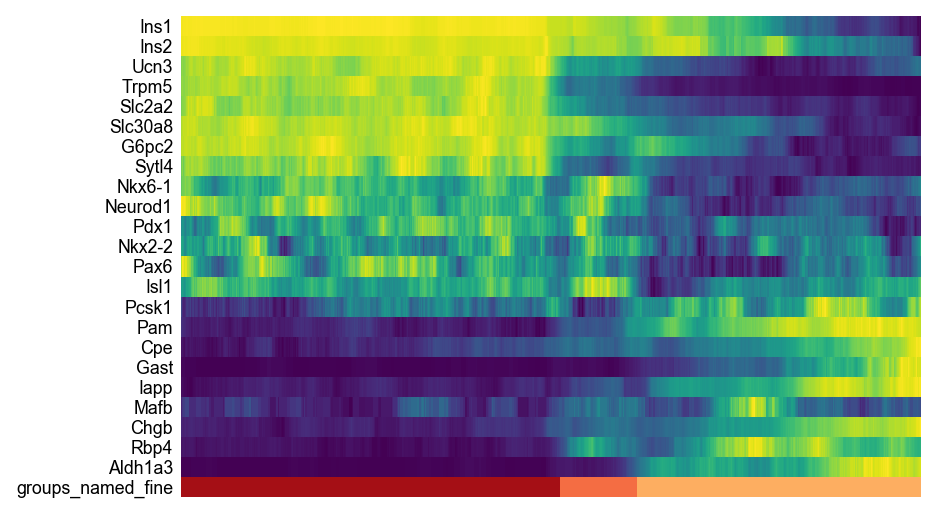

In [352]:
sc.set_figure_params(vector_friendly=True,color_map='RdGy_r',dpi_save=300,transparent=True)
paths = [('groups_named_fine', ['Ins_1','Ins_2','Ins_dedifferentiated'])]
rcParams['figure.figsize'] = (7, 4)
rcParams['figure.subplot.top'] = 0.85
rcParams['figure.subplot.bottom'] = 0.13
for ipath, (descr, path) in enumerate(paths):
    ax = sc.pl.paga_path(adata_show, left_margin=0.3,color_map='viridis',groups_key='groups_named_fine',show_node_names=False,
                         show_colorbar=False,
                        annotations=[],
                        nodes=path,
                        ytick_fontsize=8,
                        keys=gene_names,
                        n_avg=100,
                        title='',
                        normalize_to_zero_one=True, show=False)
    pl.savefig('./Fig1_Ctrl_STZ_beta_pseudotime_new_markers.pdf',dpi=300,format='pdf')

pl.show()




In [284]:
genes_deg_sorted=['Slc5a10', 'Phlda3', 'Sorcs2',
        'Dpp6',  'Ldlrad3','Nrsn1',   'Bcam','Tmem212','Clmp', 'Sh2d5',  
        'Slc39a11', 'Ptger3', 'Ache','Tenm4',                                          
        'Aldh1a3','Tagln3', 'Pabpc1l','Aldob', 'Gsto2',
        'Ttc25',
        'Gast','Cck','Cthrc1', 'Cartpt', 'Smoc1','Prss23',      
        'Gm2115','Pcp4l1', 'RP23-477O13.1']

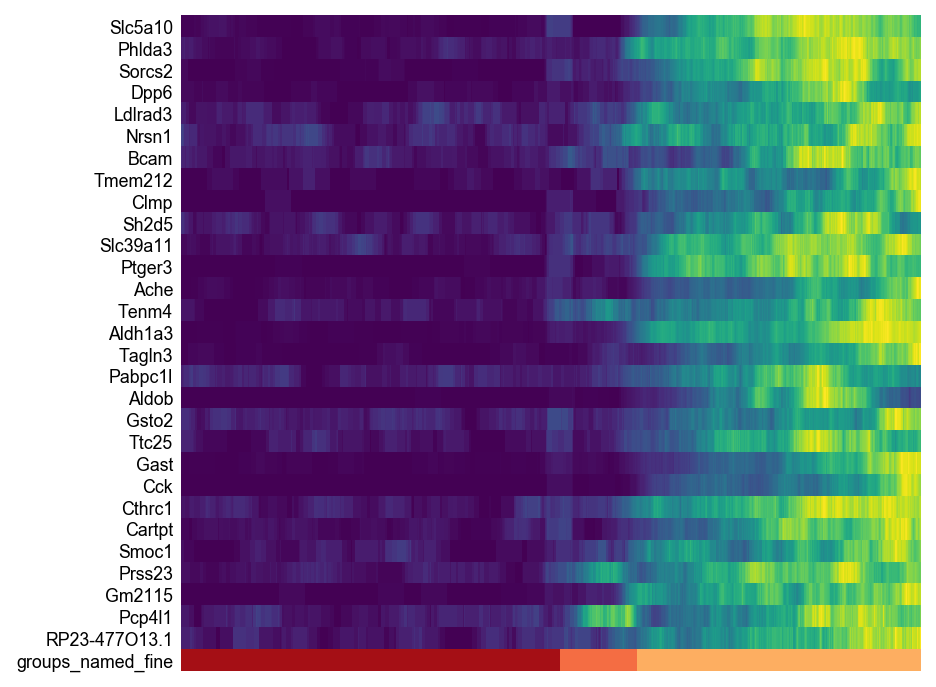

In [285]:
gene_names=genes_deg_sorted
sc.set_figure_params(vector_friendly=True,color_map='RdGy_r',dpi_save=300,transparent=True)
paths = [('groups_named_fine', ['Ins_1','Ins_2','Ins_dedifferentiated'])]
rcParams['figure.figsize'] = (7, 5.5)
rcParams['figure.subplot.top'] = 0.85
rcParams['figure.subplot.bottom'] = 0.13
for ipath, (descr, path) in enumerate(paths):
    ax = sc.pl.paga_path(adata_show, left_margin=0.3,color_map='viridis',groups_key='groups_named_fine',show_node_names=False,
                         show_colorbar=False,
                        annotations=[],
                        nodes=path,
                        ytick_fontsize=8,
                        keys=gene_names,
                        n_avg=100,
                        title='',
                        normalize_to_zero_one=True, show=False)
    pl.savefig('./Fig1_Ctrl_STZ_beta_pseudotime_dediff_sorted.pdf',dpi=300,format='pdf')

pl.show()



   
    

# Differential testing


In [375]:
def run_limma(adata, condobs, coef,ref):
    import rpy2.robjects as robjects
    import rpy2.robjects.numpy2ri
    from rpy2.robjects import pandas2ri
    from rpy2.robjects.packages import importr
    pandas2ri.activate()
    data=pd.DataFrame(adata.X.toarray(),columns=adata.var_names)
    cond=adata.obs[condobs]
  
    R=robjects.r
    R('library(edgeR)')
    R('library(limma)')
    R.assign('data',data.T)
    R.assign('cond', cond)
    
    del data
    del cond    
    
    R('cond <- as.factor(cond)')
    R('cond <- relevel(cond,'''+ref+''')''')
    R('dge <- edgeR::DGEList(data,group=cond)')

    R('rm(data)')
    R('design <- model.matrix(~cond)')
    R('y <- new("EList")')
    R('y$E <- dge')
    R('rm(dge)')
    print('run limma lmFit')
    R('fit <- limma::lmFit(y, design = design)')
    R('rm(y)')
    print('run limma eBayes')
    R('fit <-  limma::eBayes(fit, trend = TRUE, robust = TRUE)')
    
    strg='"BH"'
    tt = R('''limma::topTable(fit,coef='''+coef+''',number = Inf,adjust.method='''+strg+''')''')
    return tt


In [376]:
def abs_log2fc(adata,grouptype,group2,group1):
    #### we calculate the absolute log2-foldchange as log2(b/a) = (ln(b)-ln(a))/ln(2)    (we need to change the base since our data is ln(counts+1), we neglect the +1)        
    obs_df=pd.DataFrame(adata.X.toarray(),columns=adata.var_names)
    obs_df[grouptype]=adata.obs[grouptype].values    
                
    x=obs_df.groupby([grouptype])
    tot=x[adata.var_names].apply(np.mean)
    lfc= (tot.loc[group2] - tot.loc[group1])/np.log(2)
    return lfc

## Control reference

differential testing is performed on quantile normalized data

In [ ]:
adata_all_norm=sc.read('./data/all_quantile_norm.h5ad')

In [70]:
adata_all_norm.obs['groups_named_fine']=adata_endo_all.obs['groups_named_fine']
adata_all_norm.obs['treatment']=adata_endo_all.obs['treatment']
adata_all_norm.obs['groups_named_broad']=adata_endo_all.obs['groups_named_broad']

### STZ vs. control endocrine cell types

In [ ]:
import xlsxwriter
import seaborn as sns
for treat in ['Vehicle-STZ']:
    
    ix=np.isin(adata_all_norm.obs['treatment'],['Ctrl',treat])
    adata_sub=adata_all_norm[ix].copy()

    adata_sub.obs['treatment'].cat.remove_unused_categories(inplace=True)

    writer_genes = pd.ExcelWriter('Quantile_Final_Normalized_Ctrl_'+treat+'_limma_deg_broad.xlsx', engine='xlsxwriter')
    writer_all = pd.ExcelWriter('Quantile_Final_Normalized_Ctrl_'+treat+'_limma_deg_broad_all.xlsx', engine='xlsxwriter')

    for i in ['beta', 'alpha', 'delta', 'PP']:

        print(i)
        ix_cells = np.isin(adata_sub.obs['groups_named_broad'],[i])  ### select cells/cluster for testing
        print(np.sum(ix_cells))
        print('filter genes')

        adata_filt=adata_sub[ix_cells].copy()

        #### filter genes at least expressed in 1% of cells in either group
        ix=np.isin(adata_filt.obs['treatment'],'Ctrl')
        adata_sub1=adata_filt[ix]
        filter_1=sc.pp.filter_genes(adata_sub1.X,min_cells=adata_sub1.n_obs*0.01,copy=True)
        del adata_sub1
        ix=np.isin(adata_filt.obs['treatment'],treat)
        adata_sub1=adata_filt[ix]
        filter_2=sc.pp.filter_genes(adata_sub1.X,min_cells=adata_sub1.n_obs*0.01,copy=True)
        del adata_sub1
        ix_genes=[a or b for a, b in zip(filter_1[0],filter_2[0])]

        adata_filt=adata_filt[:,np.array(ix_genes)].copy()
        del filter_1
        del filter_2
        del ix_genes
        #### run limma
        print('run limma')

        coef_cond='"cond'+treat+'"'
        

        try:
            x=run_limma(adata_filt,'treatment',coef_cond,'"Ctrl"') ### run limma
        except rpy2.rinterface.RRuntimeError:
            print ('no significant genes..')
            continue

        print('calculate lfc')

        #### filter on absolute log2 fold change
        lfc=abs_log2fc(adata_filt,'treatment',treat,'Ctrl')
        x=x.loc[lfc.index]
        x['abs.log2FC']=lfc.values
        del lfc

        xup=x[x['logFC']>0]
        xdown=x[x['logFC']<0]

        xup.sort_values(by=['logFC'],ascending=True,inplace=True)
        xdown.sort_values(by=['logFC'],ascending=True,inplace=True)


        #### filtering DEG
        xup=xup[xup['adj.P.Val']<0.01]

        xdown=xdown[xdown['adj.P.Val']<0.01]


        xup=xup[xup['logFC']>0.3]
        xdown=xdown[xdown['logFC']<-0.3]


        try:
            ### write genes
            df = pd.DataFrame(xup)
            df_all = pd.DataFrame(x)
            if len(i)>25:
                i_short=i[0:25]
                i_short=i_short.replace('/', '_')

                df.to_excel(writer_genes,sheet_name=i_short+'_up')
                df_all.to_excel(writer_all,sheet_name=i_short)
            else:
                i=i.replace('/', '_')

                df.to_excel(writer_genes,sheet_name=i+'_up')
                df_all.to_excel(writer_all,sheet_name=i)
                
        except (ValueError,Exception):
            print ('no significant genes..')
            pass

        try:
            df = pd.DataFrame(xdown)
            if len(i)>25:
                i_short=i[0:25]
                i_short=i_short.replace('/', '_')

                df.to_excel(writer_genes,sheet_name=i_short+'_down')
            else:
                i=i.replace('/', '_')

                df.to_excel(writer_genes,sheet_name=i+'_down')


        except (ValueError,Exception):
            print ('no significant genes..')
            pass

    writer_genes.save()
    writer_all.save()

### Control Ins+ subpopulations

In [373]:
adata_all_norm.obs['groups_named_fine']=adata_endo_hvg.obs['groups_named_fine']

In [ ]:
import xlsxwriter

writer_genes = pd.ExcelWriter('Quantile_Normalized_Ctrl_beta_subpopulations.xlsx', engine='xlsxwriter')

for i in ['Ins_1','Ins_2','Ins-Ppy','Ins-Sst-Ppy']:
    
    adata_filt=adata_all_norm[np.isin(adata_all_norm.obs['treatment'],['Ctrl'])].copy()
    adata_filt=adata_filt[np.isin(adata_filt.obs['groups_named_fine'],['Ins_1',i])].copy()

    
    
    ref_clust=pd.Categorical(adata_filt.obs['groups_named_fine'],categories=list(adata_filt.obs['groups_named_fine'].cat.categories)+['clust','all'])
    ix=np.isin(adata_filt.obs['groups_named_fine'],[i])
    ref_clust[ix]='clust'
    ref_clust[np.invert(ix)] ='all'


    adata_filt.obs['test']=ref_clust
    adata_filt.obs['test'].cat.remove_unused_categories(inplace=True)    
    
    str_cond='"all"'
    coef='"condclust"'
    


    #### filter genes at least expressed in 10% of cells in either group
    ix=np.isin(adata_filt.obs['test'],'clust')
    adata_sub1=adata_filt[ix]
    filter_1=sc.pp.filter_genes(adata_sub1.X,min_cells=adata_sub1.n_obs*0.01,copy=True)
    del adata_sub1
    ix=np.isin(adata_filt.obs['test'],'all')
    adata_sub1=adata_filt[ix]
    filter_2=sc.pp.filter_genes(adata_sub1.X,min_cells=adata_sub1.n_obs*0.01,copy=True)
    del adata_sub1
    ix_genes=[a or b for a, b in zip(filter_1[0],filter_2[0])]

    adata_filt=adata_filt[:,np.array(ix_genes)].copy()
    del filter_1
    del filter_2
    del ix_genes
    #### run limma
    print('run limma')        




    try:
        x=run_limma(adata_filt,'test',coef,str_cond) ### run limma
       # x=run_limma(adata_filt,'diet','batch','"condHFD"','"CD"') ### run limma
    except rpy2.rinterface.RRuntimeError:
            print ('no significant genes..')
            continue


    print('calculate lfc')
   
    #### filter on absolute log2 fold change
    lfc=abs_log2fc(adata_filt,'test','clust','all')
    x=x.loc[lfc.index]
    x['abs.log2FC']=lfc.values
    del lfc




    xup=x[x['logFC']>0]
    xdown=x[x['logFC']<0]

    
            ### write genes
    df = pd.DataFrame(xup)
    if len(i)>25:
                i_short=i[0:25]
                i_short=i_short.replace('/', '_')

                df.to_excel(writer_genes,sheet_name=i_short+'_up')

    else:
                i=i.replace('/', '_')

                df.to_excel(writer_genes,sheet_name=i+'_up')
 
    df = pd.DataFrame(xdown)
    if len(i)>25:
                i_short=i[0:25]
                i_short=i_short.replace('/', '_')

                df.to_excel(writer_genes,sheet_name=i_short+'_down')

    else:
                i=i.replace('/', '_')

                df.to_excel(writer_genes,sheet_name=i+'_down')


writer_genes.save()

## Control alpha - PP subpopulations

In [ ]:
import xlsxwriter

writer_genes = pd.ExcelWriter('Quantile_Normalized_Ctrl_alpha_subpopulations.xlsx', engine='xlsxwriter')

for i in ['Gcg-Ppy_low','Gcg-Ppy_high','Ppy']:
    
    adata_filt=adata_all_norm[np.isin(adata_all_norm.obs['treatment'],['Ctrl'])].copy()
    adata_filt=adata_filt[np.isin(adata_filt.obs['groups_named_fine'],['Gcg',i])].copy()

    
    
    ref_clust=pd.Categorical(adata_filt.obs['groups_named_fine'],categories=list(adata_filt.obs['groups_named_fine'].cat.categories)+['clust','all'])
    ix=np.isin(adata_filt.obs['groups_named_fine'],[i])
    ref_clust[ix]='clust'
    ref_clust[np.invert(ix)] ='all'


    adata_filt.obs['test']=ref_clust
    adata_filt.obs['test'].cat.remove_unused_categories(inplace=True)    
    
    str_cond='"all"'
    coef='"condclust"'
    


    #### filter genes at least expressed in 10% of cells in either group
    ix=np.isin(adata_filt.obs['test'],'clust')
    adata_sub1=adata_filt[ix]
    filter_1=sc.pp.filter_genes(adata_sub1.X,min_cells=adata_sub1.n_obs*0.01,copy=True)
    del adata_sub1
    ix=np.isin(adata_filt.obs['test'],'all')
    adata_sub1=adata_filt[ix]
    filter_2=sc.pp.filter_genes(adata_sub1.X,min_cells=adata_sub1.n_obs*0.01,copy=True)
    del adata_sub1
    ix_genes=[a or b for a, b in zip(filter_1[0],filter_2[0])]

    adata_filt=adata_filt[:,np.array(ix_genes)].copy()
    del filter_1
    del filter_2
    del ix_genes
    #### run limma
    print('run limma')        




    try:
        x=run_limma(adata_filt,'test',coef,str_cond) ### run limma
    except rpy2.rinterface.RRuntimeError:
            print ('no significant genes..')
            continue


    print('calculate lfc')
   
    #### filter on absolute log2 fold change
    lfc=abs_log2fc(adata_filt,'test','clust','all')
    x=x.loc[lfc.index]
    x['abs.log2FC']=lfc.values
    del lfc



    ### scaling lfc for gene weight input

    xup=x[x['logFC']>0]
    xdown=x[x['logFC']<0]



    
            ### write genes
    df = pd.DataFrame(xup)
    if len(i)>25:
                i_short=i[0:25]
                i_short=i_short.replace('/', '_')

                df.to_excel(writer_genes,sheet_name=i_short+'_up')

    else:
                i=i.replace('/', '_')

                df.to_excel(writer_genes,sheet_name=i+'_up')
 
    df = pd.DataFrame(xdown)
    if len(i)>25:
                i_short=i[0:25]
                i_short=i_short.replace('/', '_')

                df.to_excel(writer_genes,sheet_name=i_short+'_down')

    else:
                i=i.replace('/', '_')

                df.to_excel(writer_genes,sheet_name=i+'_down')


writer_genes.save()

## Treatment effects 

### polyhormonals

In [ ]:
import xlsxwriter
import seaborn as sns

for treat in ['Estrogen', 'GLP1', 'GLP1-E', 'PEG-insulin',
       'GLP1-E + PEG-insulin']:
    
    
    
    ix=np.isin(adata_all_norm.obs['treatment'],['Vehicle-STZ',treat])
    adata_sub=adata_all_norm[ix,:].copy()
 
     
    adata_sub.obs['treatment'].cat.remove_unused_categories(inplace=True)
    
    
    
    refgroup=pd.Categorical(adata_sub.obs['treatment'],categories=['Vehicle-STZ','aSTZ']+[treat])
    ix=np.isin(adata_sub.obs['treatment'],['Vehicle-STZ'])
    refgroup[ix]='aSTZ'
    adata_sub.obs['treatment']=refgroup
    adata_sub.obs['treatment'].cat.remove_unused_categories(inplace=True)


    writer_genes = pd.ExcelWriter('Quantile_Normalized_STZ_'+treat+'_limma_deg_fine.xlsx', engine='xlsxwriter')
    writer_all = pd.ExcelWriter('Quantile_Normalized_STZ_'+treat+'_limma_deg_fine_all.xlsx', engine='xlsxwriter')



    for i in ['Ins-Ppy','Ins-Sst-Ppy', 'Gcg-Ppy_low',
       'Gcg-Ppy_high']:


      

        print(i)
        ix_cells = np.isin(adata_sub.obs['groups_named_fine'],[i])  ### select cells/cluster for testing
        print(np.sum(ix_cells))
        print('filter genes')

        adata_filt=adata_sub[ix_cells].copy()


        #### filter genes at least expressed in 10% of cells in either group
        ix=np.isin(adata_filt.obs['treatment'],'aSTZ')
        adata_sub1=adata_filt[ix].copy()
        filter_1=sc.pp.filter_genes(adata_sub1.X,min_cells=adata_sub1.n_obs*0.01,copy=True)
        del adata_sub1
        ix=np.isin(adata_filt.obs['treatment'],treat)
        adata_sub1=adata_filt[ix].copy()
        filter_2=sc.pp.filter_genes(adata_sub1.X,min_cells=adata_sub1.n_obs*0.01,copy=True)
        del adata_sub1
        ix_genes=[a or b for a, b in zip(filter_1[0],filter_2[0])]

        adata_filt=adata_filt[:,np.array(ix_genes)].copy()
        del filter_1
        del filter_2
        del ix_genes
        #### run limma
        print('run limma')




        coef_cond='"cond'+treat+'"'
        




        try:
            x=run_limma(adata_filt,'treatment',coef_cond,'"aSTZ"') ### run limma
       # x=run_limma(adata_filt,'diet','batch','"condHFD"','"CD"') ### run limma
        except rpy2.rinterface.RRuntimeError:
            print ('no significant genes..')
            continue


        print('calculate lfc')

        #### filter on absolute log2 fold change
        lfc=abs_log2fc(adata_filt,'treatment',treat,'aSTZ')
        x=x.loc[lfc.index]
        x['abs.log2FC']=lfc.values
        del lfc



        ### scaling lfc for gene weight input

        xup=x[x['logFC']>0]
        xdown=x[x['logFC']<0]

        xup.sort_values(by=['logFC'],ascending=True,inplace=True)
        xdown.sort_values(by=['logFC'],ascending=True,inplace=True)


        xup['log_weight']=xup['logFC']
        #xup['log_weight'][xup['abs.log2FC']>=0.5]=0.5


        #### filtering DEG
        xup=xup[xup['adj.P.Val']<0.01]

        xdown=xdown[xdown['adj.P.Val']<0.01]


        xup=xup[xup['logFC']>0.3]
        xdown=xdown[xdown['logFC']<-0.3]


        try:
            ### write genes
            df = pd.DataFrame(xup)
            df_all = pd.DataFrame(x)
            if len(i)>25:
                i_short=i[0:25]
                i_short=i_short.replace('/', '_')

                df.to_excel(writer_genes,sheet_name=i_short+'_up')
                df_all.to_excel(writer_all,sheet_name=i_short)
            else:
                i=i.replace('/', '_')

                df.to_excel(writer_genes,sheet_name=i+'_up')
                df_all.to_excel(writer_all,sheet_name=i)


        except (ValueError,Exception):
            print ('no significant go term..')
            pass


        try:
            df = pd.DataFrame(xdown)
            if len(i)>25:
                i_short=i[0:25]
                i_short=i_short.replace('/', '_')

                df.to_excel(writer_genes,sheet_name=i_short+'_down')
            else:
                i=i.replace('/', '_')

                df.to_excel(writer_genes,sheet_name=i+'_down')

        except (ValueError,Exception):
            print ('no significant go term..')
            pass
    
    writer_genes.save()
    writer_all.save()

### endocrine populations

In [ ]:
import xlsxwriter
import seaborn as sns

for treat in ['Estrogen', 'GLP1', 'GLP1-E', 'PEG-insulin',
       'GLP1-E + PEG-insulin']:
    
    
    ix=np.isin(adata_all_norm.obs['treatment'],['Vehicle-STZ',treat])
    adata_sub=adata_all_norm[ix,:]
 
     
    adata_sub.obs['treatment'].cat.remove_unused_categories(inplace=True)
    
    
    
    refgroup=pd.Categorical(adata_sub.obs['treatment'],categories=['Vehicle-STZ','aSTZ']+[treat])
    ix=np.isin(adata_sub.obs['treatment'],['Vehicle-STZ'])
    refgroup[ix]='aSTZ'
    adata_sub.obs['treatment']=refgroup
    adata_sub.obs['treatment'].cat.remove_unused_categories(inplace=True)


    writer_genes = pd.ExcelWriter('Quantile_Normalized_STZ_'+treat+'_limma_deg_broad.xlsx', engine='xlsxwriter')
    writer_all = pd.ExcelWriter('Quantile_Normalized_STZ_'+treat+'_limma_deg_broad_all.xlsx', engine='xlsxwriter')



    for i in ['beta', 'alpha', 'delta', 'PP']:


      

        print(i)
        ix_cells = np.isin(adata_sub.obs['groups_named_broad'],[i])  ### select cells/cluster for testing
        print(np.sum(ix_cells))
        print('filter genes')

        adata_filt=adata_sub[ix_cells].copy()


        #### filter genes at least expressed in 10% of cells in either group
        ix=np.isin(adata_filt.obs['treatment'],'aSTZ')
        adata_sub1=adata_filt[ix]
        filter_1=sc.pp.filter_genes(adata_sub1.X,min_cells=adata_sub1.n_obs*0.01,copy=True)
        del adata_sub1
        ix=np.isin(adata_filt.obs['treatment'],treat)
        adata_sub1=adata_filt[ix]
        filter_2=sc.pp.filter_genes(adata_sub1.X,min_cells=adata_sub1.n_obs*0.01,copy=True)
        del adata_sub1
        ix_genes=[a or b for a, b in zip(filter_1[0],filter_2[0])]

        adata_filt=adata_filt[:,np.array(ix_genes)].copy()
        del filter_1
        del filter_2
        del ix_genes
        #### run limma
        print('run limma')

        coef_cond='"cond'+treat+'"'
        




        try:
            x=run_limma(adata_filt,'treatment',coef_cond,'"aSTZ"') ### run limma
        except rpy2.rinterface.RRuntimeError:
            print ('no significant genes..')
            continue


        print('calculate lfc')

        #### filter on absolute log2 fold change
        lfc=abs_log2fc(adata_filt,'treatment',treat,'aSTZ')
        x=x.loc[lfc.index]
        x['abs.log2FC']=lfc.values
        del lfc



        ### scaling lfc for gene weight input

        xup=x[x['logFC']>0]
        xdown=x[x['logFC']<0]

        xup.sort_values(by=['logFC'],ascending=True,inplace=True)
        xdown.sort_values(by=['logFC'],ascending=True,inplace=True)


        #### filtering DEG
        xup=xup[xup['adj.P.Val']<0.01]

        xdown=xdown[xdown['adj.P.Val']<0.01]


        xup=xup[xup['logFC']>0.3]
        xdown=xdown[xdown['logFC']<-0.3]



        try:
            ### write genes
            df = pd.DataFrame(xup)
            df_all = pd.DataFrame(x)
            if len(i)>25:
                i_short=i[0:25]
                i_short=i_short.replace('/', '_')

                df.to_excel(writer_genes,sheet_name=i_short+'_up')
                df_all.to_excel(writer_all,sheet_name=i_short)
            else:
                i=i.replace('/', '_')

                df.to_excel(writer_genes,sheet_name=i+'_up')
                df_all.to_excel(writer_all,sheet_name=i)


        except (ValueError,Exception):
            print ('no significant genes..')
            pass


        try:
            df = pd.DataFrame(xdown)
            if len(i)>25:
                i_short=i[0:25]
                i_short=i_short.replace('/', '_')

                df.to_excel(writer_genes,sheet_name=i_short+'_down')
            else:
                i=i.replace('/', '_')

                df.to_excel(writer_genes,sheet_name=i+'_down')


        except (ValueError,Exception):
            print ('no significant genes..')
            pass

    writer_genes.save()
    writer_all.save()

# Embedding and PAGA for each treatment

In [473]:
sc.set_figure_params(vector_friendly=True,color_map='RdBu_r',dpi_save=300,transparent=True)

In [249]:
cols_cd=['#a50f15',
 '#f46d43',
 '#fdae61',
 '#aec7e8',
 #'#35978f',
 '#98df8a',
 '#2ca02c',
 '#ff9896',
 '#9467bd',
 '#b15928',
 '#1f78b4']
cols_stz=['#a50f15',
 '#f46d43',
 '#fdae61',
 '#aec7e8',
 '#35978f',
 '#98df8a',
 '#2ca02c',
 '#ff9896',
 '#9467bd',
 '#b15928',
 '#1f78b4']
pos_cd=np.array([[-6.8691037843, -3.3175023824],
       [-6.005226938 , -0.8610376029],
       [-2.0661997735, -0],
       [-4.9481116661,  1.7610011512],
       #[ 0,  1.9],
       [-0.5, 5.9],
       [10.1631199571,  3.4228599671],
       [ 7.951153206 ,  1.2951546357],
       [ 6.9991351026,  5.0314498193],
       [ 6.0593712466,  2.7509562329],
       [ 1.5301080788,  8.9667552257]])

pos=np.array([[-6.8691037843, -3.3175023824],
       [-6.005226938 , -0.8610376029],
       [-2.0661997735, -0],
       [-4.9481116661,  1.7610011512],
       [ 0,  1.9],
       [-0.5, 5.9],
       [10.1631199571,  3.4228599671],
       [ 7.951153206 ,  1.2951546357],
       [ 6.9991351026,  5.0314498193],
       [ 6.0593712466,  2.7509562329],
       [ 1.5301080788,  8.9667552257]])

In [304]:
labels_cd=['','','','','','','','','','']
labels_stz=['','','','','','','','','','','']

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:01.45) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix
running partition-based graph abstraction (PAGA)
    finished (0:00:00.08) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/confidence', confidence adjacency (adata.uns)
    'paga/confidence_tree', confidence subtree (adata.uns)
Graph has more than a single connected component. To restrict to this component, pass `single_component=True`.
--> added 'pos', the PAGA positions (adata.uns['paga'])
saving figure to file /Users/sophie/Documents/ICB/Projects/2018_10X_Glp_Est_Mice/Analysis_vers_1_0/final_figures_paper/paga_GLP1.pdf


/Users/sophie/miniconda3/lib/python3.5/site-packages/scipy/sparse/compressed.py:274: SparseEfficiencyWarning: Comparing a sparse matrix with a scalar greater than zero using < is inefficient, try using >= instead.
  warn(bad_scalar_msg, SparseEfficiencyWarning)


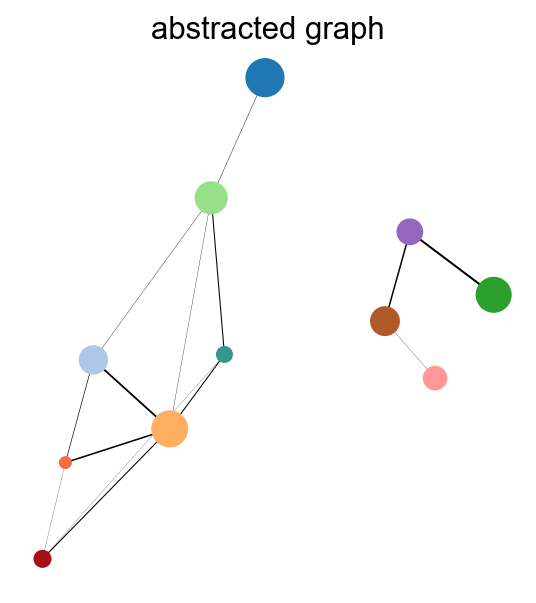

In [307]:
treat='GLP1'
ix=np.isin(adata_endo_hvg.obs['treatment'],[treat])
adata_sub_hvg_endo=adata_endo_hvg[ix].copy()
adata_sub_hvg_endo.uns['groups_named_fine_colors']=cols_stz
sc.pp.pca(adata_sub_hvg_endo)
sc.pp.neighbors(adata_sub_hvg_endo)
sc.tl.paga(adata_sub_hvg_endo,groups='groups_named_fine')
sc.pl.paga(adata_sub_hvg_endo,pos=pos,frameon=False,labels=labels_stz,save='_'+treat+'.pdf')

saving figure to file /Users/sophie/Documents/ICB/Projects/2018_10X_Glp_Est_Mice/Analysis_vers_1_0/final_figures_paper/umap_GLP1.pdf


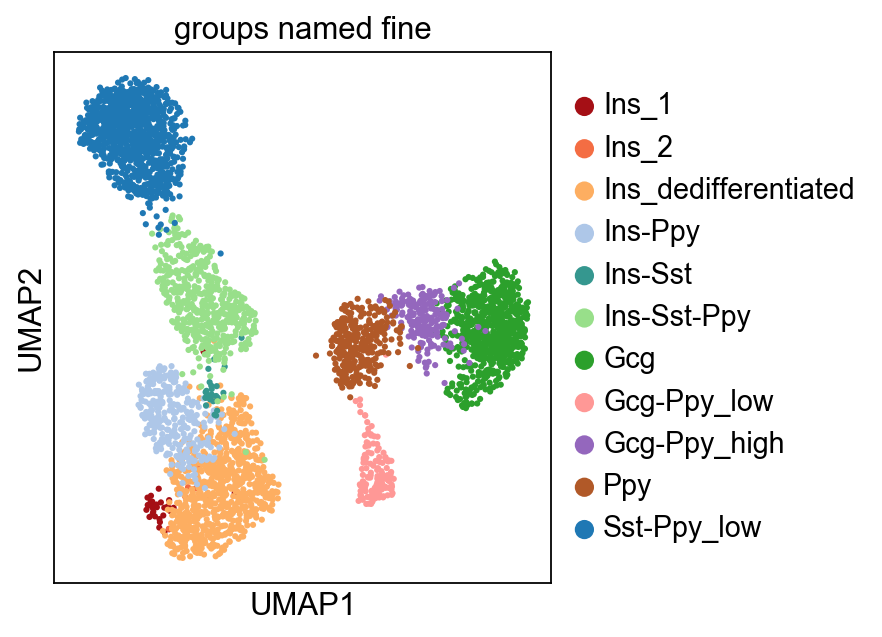

In [294]:
sc.tl.umap(adata_sub_hvg_endo,init_pos='paga',min_dist=0.8)
adata_sub_hvg_endo.write('.write/endo_'+treat+'.h5ad')
treat='GLP1'
adata_sub_hvg_endo=sc.read('.write/endo_'+treat+'.h5ad')
sc.pl.umap(adata_sub_hvg_endo,color=['groups_named_fine'],save='_'+treat+'.pdf')


computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:02.03) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix
running partition-based graph abstraction (PAGA)
    finished (0:00:00.11) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/confidence', confidence adjacency (adata.uns)
    'paga/confidence_tree', confidence subtree (adata.uns)
running partition-based graph abstraction (PAGA)
    finished (0:00:00.11) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/confidence', confidence adjacency (adata.uns)
    'paga/confidence_tree', confidence subtree (adata.uns)
--> added 'pos', the PAGA positions (adata.uns['paga'])
saving figure to file /Users/sophie/Documents/ICB/Projects/2018_10X_Glp_Est_Mice/Analysis_vers_1_0/final_figures_paper/paga_Estrogen.pdf


/Users/sophie/miniconda3/lib/python3.5/site-packages/scipy/sparse/compressed.py:274: SparseEfficiencyWarning: Comparing a sparse matrix with a scalar greater than zero using < is inefficient, try using >= instead.
  warn(bad_scalar_msg, SparseEfficiencyWarning)


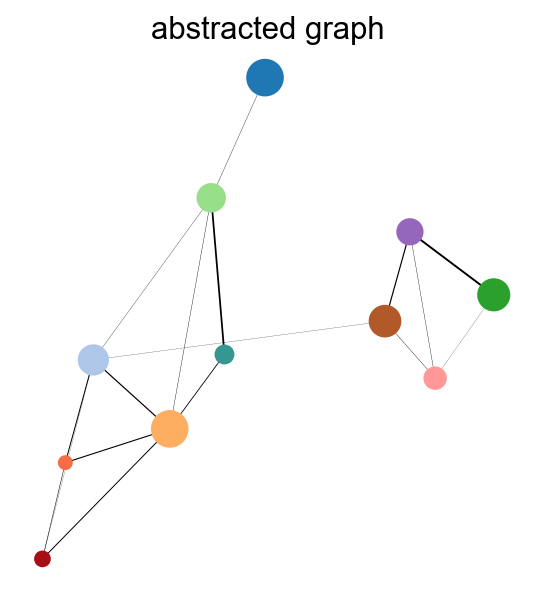

computing UMAP
    finished (0:00:08.28) --> added
    'X_umap', UMAP coordinates (adata.obsm)
saving figure to file /Users/sophie/Documents/ICB/Projects/2018_10X_Glp_Est_Mice/Analysis_vers_1_0/final_figures_paper/umap_Estrogen.pdf


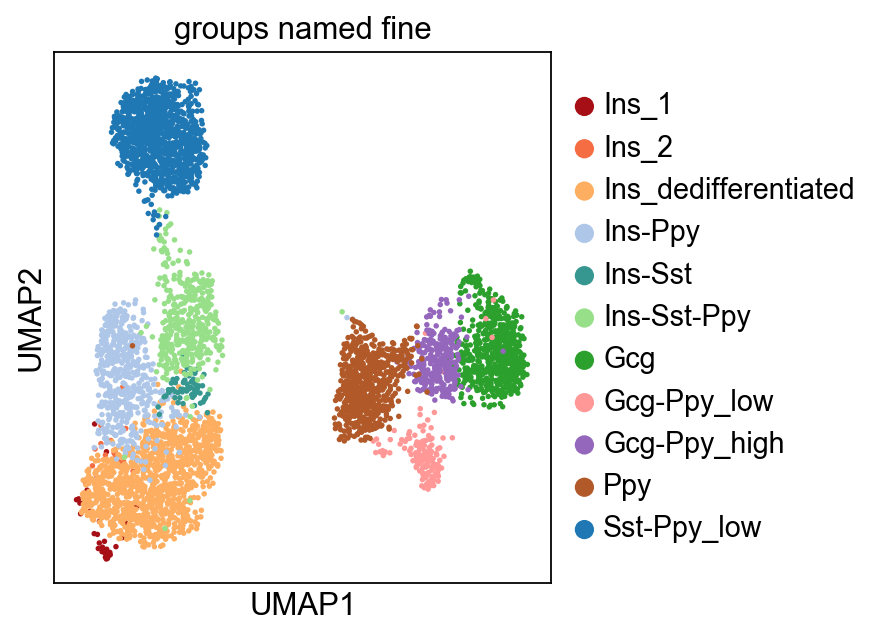

In [309]:
treat='Estrogen'
ix=np.isin(adata_endo_hvg.obs['treatment'],[treat])
adata_sub_hvg_endo=adata_endo_hvg[ix].copy()
adata_sub_hvg_endo.uns['groups_named_fine_colors']=cols_stz
sc.pp.pca(adata_sub_hvg_endo)
sc.pp.neighbors(adata_sub_hvg_endo)
sc.tl.paga(adata_sub_hvg_endo,groups='groups_named_fine')
sc.tl.paga(adata_sub_hvg_endo,groups='groups_named_fine')
sc.pl.paga(adata_sub_hvg_endo,pos=pos,frameon=False,labels=labels_stz,save='_'+treat+'.pdf')

sc.tl.umap(adata_sub_hvg_endo,init_pos='paga',min_dist=0.8)
sc.pl.umap(adata_sub_hvg_endo,color=['groups_named_fine'],save='_'+treat+'.pdf')
adata_sub_hvg_endo.write('.write/endo_'+treat+'.h5ad')


Graph has more than a single connected component. To restrict to this component, pass `single_component=True`.
--> added 'pos', the PAGA positions (adata.uns['paga'])
saving figure to file /Users/sophie/Documents/ICB/Projects/2018_10X_Glp_Est_Mice/Analysis_vers_1_0/final_figures_paper/paga_thr05_Estrogen.pdf


/Users/sophie/miniconda3/lib/python3.5/site-packages/scipy/sparse/compressed.py:274: SparseEfficiencyWarning: Comparing a sparse matrix with a scalar greater than zero using < is inefficient, try using >= instead.
  warn(bad_scalar_msg, SparseEfficiencyWarning)


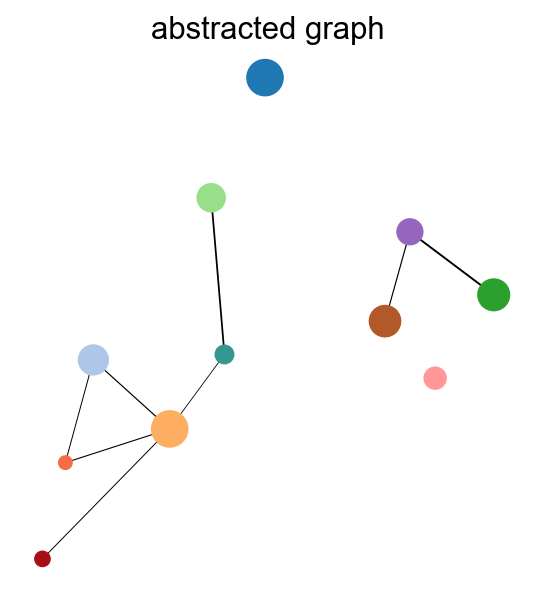

In [316]:
treat='Estrogen'
adata_sub_hvg_endo=sc.read('.write/endo_'+treat+'.h5ad')
sc.pl.paga(adata_sub_hvg_endo,pos=pos,threshold_solid=0.05,frameon=False,labels=labels_stz,save='_thr05_'+treat+'.pdf')


computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:02.24) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix
running partition-based graph abstraction (PAGA)
    finished (0:00:00.13) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/confidence', confidence adjacency (adata.uns)
    'paga/confidence_tree', confidence subtree (adata.uns)
Graph has more than a single connected component. To restrict to this component, pass `single_component=True`.
--> added 'pos', the PAGA positions (adata.uns['paga'])
saving figure to file /Users/sophie/Documents/ICB/Projects/2018_10X_Glp_Est_Mice/Analysis_vers_1_0/final_figures_paper/paga_GLP1-E.pdf


/Users/sophie/miniconda3/lib/python3.5/site-packages/scipy/sparse/compressed.py:274: SparseEfficiencyWarning: Comparing a sparse matrix with a scalar greater than zero using < is inefficient, try using >= instead.
  warn(bad_scalar_msg, SparseEfficiencyWarning)


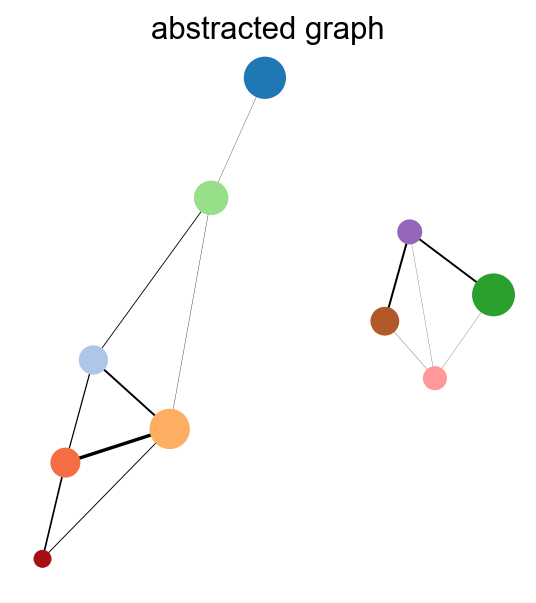

computing UMAP
    finished (0:00:08.76) --> added
    'X_umap', UMAP coordinates (adata.obsm)
saving figure to file /Users/sophie/Documents/ICB/Projects/2018_10X_Glp_Est_Mice/Analysis_vers_1_0/final_figures_paper/umap_GLP1-E.pdf


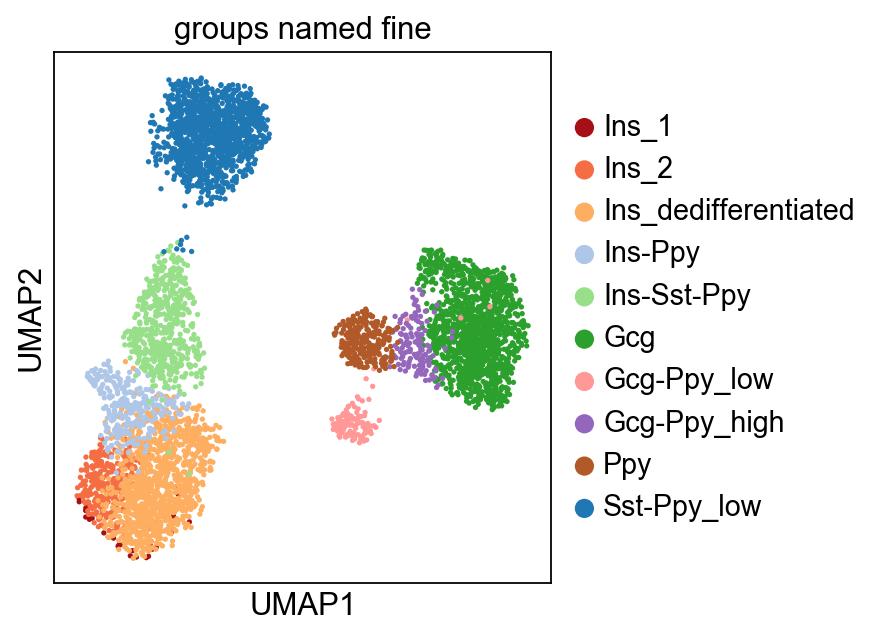

In [310]:
treat='GLP1-E'
ix=np.isin(adata_endo_hvg.obs['treatment'],[treat])
adata_sub_hvg_endo=adata_endo_hvg[ix].copy()
adata_sub_hvg_endo.uns['groups_named_fine_colors']=cols_cd
sc.pp.pca(adata_sub_hvg_endo)
sc.pp.neighbors(adata_sub_hvg_endo)
sc.tl.paga(adata_sub_hvg_endo,groups='groups_named_fine')
sc.pl.paga(adata_sub_hvg_endo,pos=pos_cd,frameon=False,labels=labels_cd,save='_'+treat+'.pdf')

sc.tl.umap(adata_sub_hvg_endo,init_pos='paga',min_dist=0.8)
sc.pl.umap(adata_sub_hvg_endo,color=['groups_named_fine'],save='_'+treat+'.pdf')
adata_sub_hvg_endo.write('.write/endo_'+treat+'.h5ad')


Graph has more than a single connected component. To restrict to this component, pass `single_component=True`.
--> added 'pos', the PAGA positions (adata.uns['paga'])
saving figure to file /Users/sophie/Documents/ICB/Projects/2018_10X_Glp_Est_Mice/Analysis_vers_1_0/final_figures_paper/paga_thr05_GLP1-E.pdf


/Users/sophie/miniconda3/lib/python3.5/site-packages/scipy/sparse/compressed.py:274: SparseEfficiencyWarning: Comparing a sparse matrix with a scalar greater than zero using < is inefficient, try using >= instead.
  warn(bad_scalar_msg, SparseEfficiencyWarning)


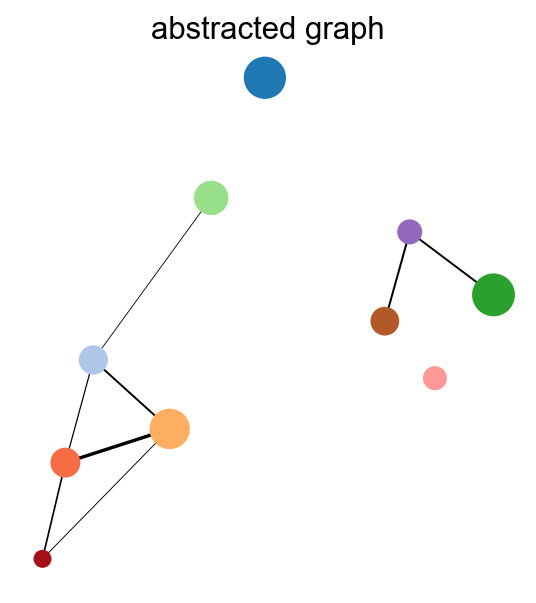

In [319]:
treat='GLP1-E'
adata_sub_hvg_endo=sc.read('.write/endo_'+treat+'.h5ad')
sc.pl.paga(adata_sub_hvg_endo,pos=pos_cd,threshold_solid=0.05,frameon=False,labels=labels_cd,save='_thr05_'+treat+'.pdf')

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:01.04) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix
running partition-based graph abstraction (PAGA)
    finished (0:00:00.06) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/confidence', confidence adjacency (adata.uns)
    'paga/confidence_tree', confidence subtree (adata.uns)
Graph has more than a single connected component. To restrict to this component, pass `single_component=True`.
--> added 'pos', the PAGA positions (adata.uns['paga'])
saving figure to file /Users/sophie/Documents/ICB/Projects/2018_10X_Glp_Est_Mice/Analysis_vers_1_0/final_figures_paper/paga_PEG-insulin.pdf


/Users/sophie/miniconda3/lib/python3.5/site-packages/scipy/sparse/compressed.py:274: SparseEfficiencyWarning: Comparing a sparse matrix with a scalar greater than zero using < is inefficient, try using >= instead.
  warn(bad_scalar_msg, SparseEfficiencyWarning)


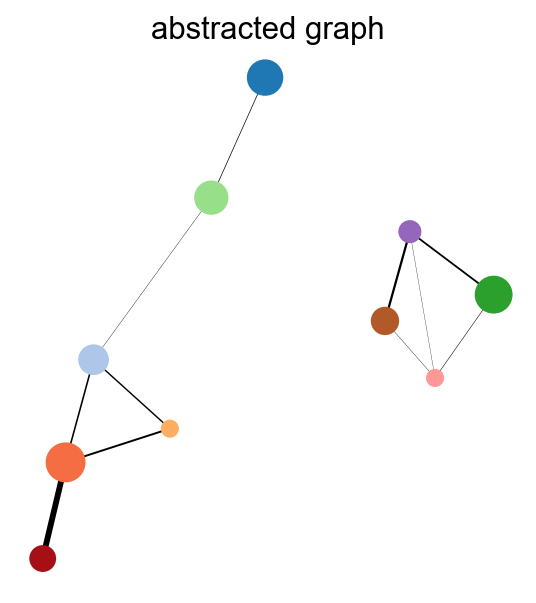

computing UMAP
    finished (0:00:05.91) --> added
    'X_umap', UMAP coordinates (adata.obsm)
saving figure to file /Users/sophie/Documents/ICB/Projects/2018_10X_Glp_Est_Mice/Analysis_vers_1_0/final_figures_paper/umap_PEG-insulin.pdf


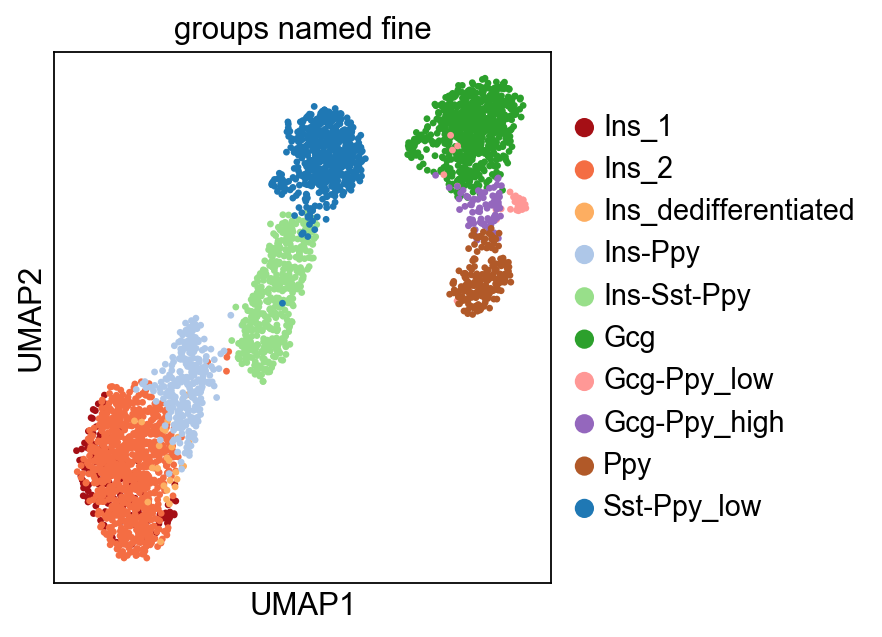

In [311]:
treat='PEG-insulin'
ix=np.isin(adata_endo_hvg.obs['treatment'],[treat])
adata_sub_hvg_endo=adata_endo_hvg[ix].copy()
adata_sub_hvg_endo.uns['groups_named_fine_colors']=cols_cd
sc.pp.pca(adata_sub_hvg_endo)
sc.pp.neighbors(adata_sub_hvg_endo)
sc.tl.paga(adata_sub_hvg_endo,groups='groups_named_fine')
sc.pl.paga(adata_sub_hvg_endo,pos=pos_cd,frameon=False,labels=labels_cd,save='_'+treat+'.pdf')

sc.tl.umap(adata_sub_hvg_endo,init_pos='paga',min_dist=0.8)
sc.pl.umap(adata_sub_hvg_endo,color=['groups_named_fine'],save='_'+treat+'.pdf')
adata_sub_hvg_endo.write('.write/endo_'+treat+'.h5ad')

Graph has more than a single connected component. To restrict to this component, pass `single_component=True`.
--> added 'pos', the PAGA positions (adata.uns['paga'])
saving figure to file /Users/sophie/Documents/ICB/Projects/2018_10X_Glp_Est_Mice/Analysis_vers_1_0/final_figures_paper/paga_thr05_PEG-insulin.pdf


/Users/sophie/miniconda3/lib/python3.5/site-packages/scipy/sparse/compressed.py:274: SparseEfficiencyWarning: Comparing a sparse matrix with a scalar greater than zero using < is inefficient, try using >= instead.
  warn(bad_scalar_msg, SparseEfficiencyWarning)


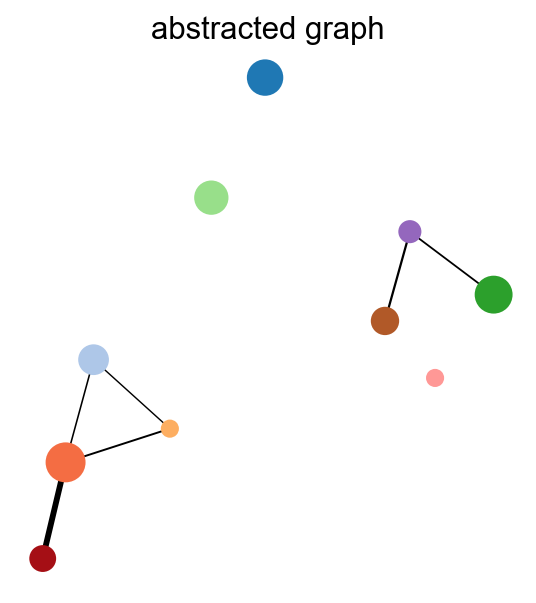

In [320]:
treat='PEG-insulin'
adata_sub_hvg_endo=sc.read('.write/endo_'+treat+'.h5ad')
sc.pl.paga(adata_sub_hvg_endo,pos=pos_cd,threshold_solid=0.05,frameon=False,labels=labels_cd,save='_thr05_'+treat+'.pdf')

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:01.19) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix
running partition-based graph abstraction (PAGA)
    finished (0:00:00.07) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/confidence', confidence adjacency (adata.uns)
    'paga/confidence_tree', confidence subtree (adata.uns)
Graph has more than a single connected component. To restrict to this component, pass `single_component=True`.
--> added 'pos', the PAGA positions (adata.uns['paga'])
saving figure to file /Users/sophie/Documents/ICB/Projects/2018_10X_Glp_Est_Mice/Analysis_vers_1_0/final_figures_paper/paga_GLP1-E + PEG-insulin.pdf


/Users/sophie/miniconda3/lib/python3.5/site-packages/scipy/sparse/compressed.py:274: SparseEfficiencyWarning: Comparing a sparse matrix with a scalar greater than zero using < is inefficient, try using >= instead.
  warn(bad_scalar_msg, SparseEfficiencyWarning)


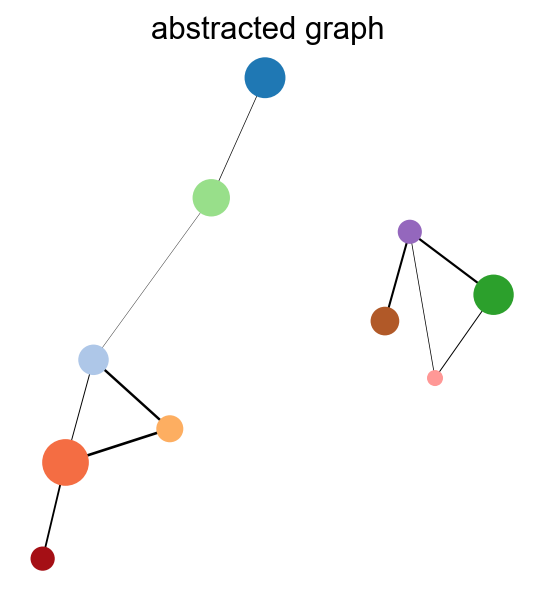

computing UMAP
    finished (0:00:05.62) --> added
    'X_umap', UMAP coordinates (adata.obsm)
saving figure to file /Users/sophie/Documents/ICB/Projects/2018_10X_Glp_Est_Mice/Analysis_vers_1_0/final_figures_paper/umap_GLP1-E + PEG-insulin.pdf


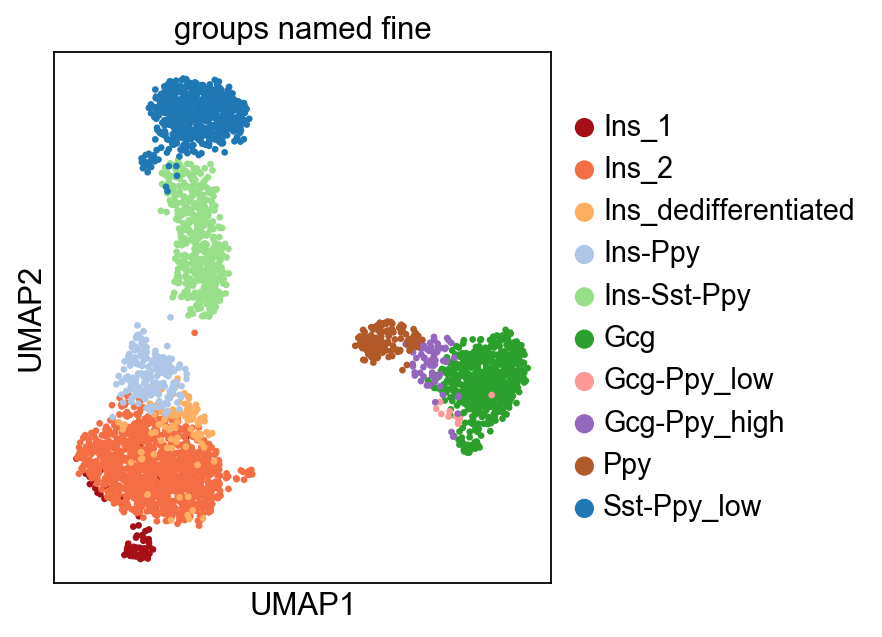

In [312]:
treat='GLP1-E + PEG-insulin'
ix=np.isin(adata_endo_hvg.obs['treatment'],[treat])
adata_sub_hvg_endo=adata_endo_hvg[ix].copy()
adata_sub_hvg_endo.uns['groups_named_fine_colors']=cols_cd
sc.pp.pca(adata_sub_hvg_endo)
sc.pp.neighbors(adata_sub_hvg_endo)
sc.tl.paga(adata_sub_hvg_endo,groups='groups_named_fine')
sc.pl.paga(adata_sub_hvg_endo,pos=pos_cd,frameon=False,labels=labels_cd,save='_'+treat+'.pdf')

sc.tl.umap(adata_sub_hvg_endo,init_pos='paga',min_dist=0.8)
sc.pl.umap(adata_sub_hvg_endo,color=['groups_named_fine'],save='_'+treat+'.pdf')
adata_sub_hvg_endo.write('.write/endo_'+treat+'.h5ad')

Graph has more than a single connected component. To restrict to this component, pass `single_component=True`.
--> added 'pos', the PAGA positions (adata.uns['paga'])
saving figure to file /Users/sophie/Documents/ICB/Projects/2018_10X_Glp_Est_Mice/Analysis_vers_1_0/final_figures_paper/paga_thr05_GLP1-E + PEG-insulin.pdf


/Users/sophie/miniconda3/lib/python3.5/site-packages/scipy/sparse/compressed.py:274: SparseEfficiencyWarning: Comparing a sparse matrix with a scalar greater than zero using < is inefficient, try using >= instead.
  warn(bad_scalar_msg, SparseEfficiencyWarning)


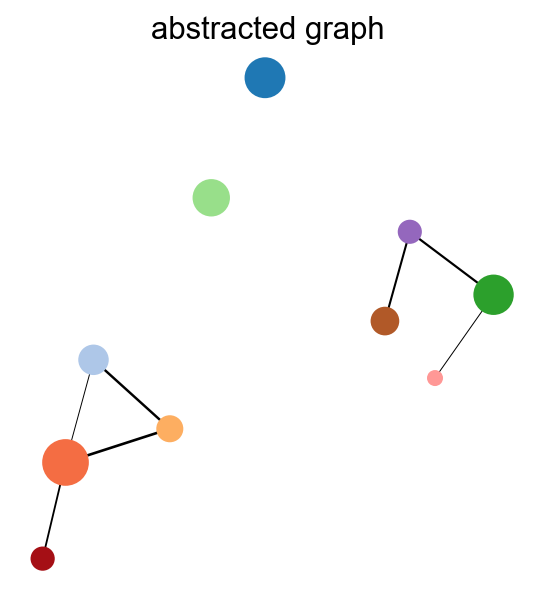

In [321]:
treat='GLP1-E + PEG-insulin'
adata_sub_hvg_endo=sc.read('.write/endo_'+treat+'.h5ad')
sc.pl.paga(adata_sub_hvg_endo,pos=pos_cd,threshold_solid=0.05,frameon=False,labels=labels_cd,save='_thr05_'+treat+'.pdf')

saving figure to file /Users/sophie/Documents/ICB/Projects/2018_10X_Glp_Est_Mice/Analysis_vers_1_0/final_figures_paper/umap_GLP1-E + PEG-insulin_grey.pdf


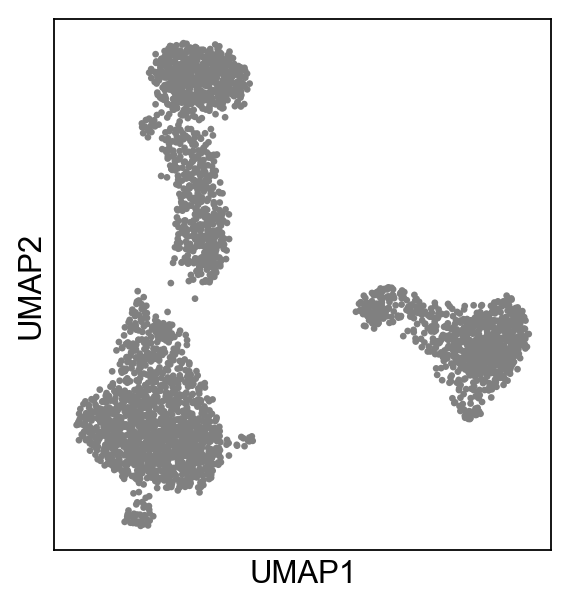

In [479]:
treat='GLP1-E + PEG-insulin'
adata_sub_hvg_endo=sc.read('.write/endo_'+treat+'.h5ad')
sc.pl.umap(adata_sub_hvg_endo,save='_'+treat+'_grey.pdf')

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:02.00) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix
running partition-based graph abstraction (PAGA)
    finished (0:00:00.11) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/confidence', confidence adjacency (adata.uns)
    'paga/confidence_tree', confidence subtree (adata.uns)
Graph has more than a single connected component. To restrict to this component, pass `single_component=True`.
--> added 'pos', the PAGA positions (adata.uns['paga'])
saving figure to file /Users/sophie/Documents/ICB/Projects/2018_10X_Glp_Est_Mice/Analysis_vers_1_0/final_figures_paper/paga_Vehicle-STZ.pdf


/Users/sophie/miniconda3/lib/python3.5/site-packages/scipy/sparse/compressed.py:274: SparseEfficiencyWarning: Comparing a sparse matrix with a scalar greater than zero using < is inefficient, try using >= instead.
  warn(bad_scalar_msg, SparseEfficiencyWarning)


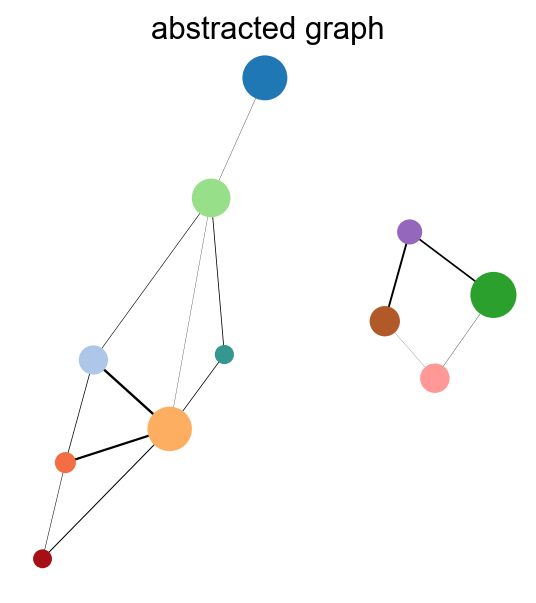

computing UMAP
    finished (0:00:08.53) --> added
    'X_umap', UMAP coordinates (adata.obsm)
saving figure to file /Users/sophie/Documents/ICB/Projects/2018_10X_Glp_Est_Mice/Analysis_vers_1_0/final_figures_paper/umap_Vehicle-STZ.pdf


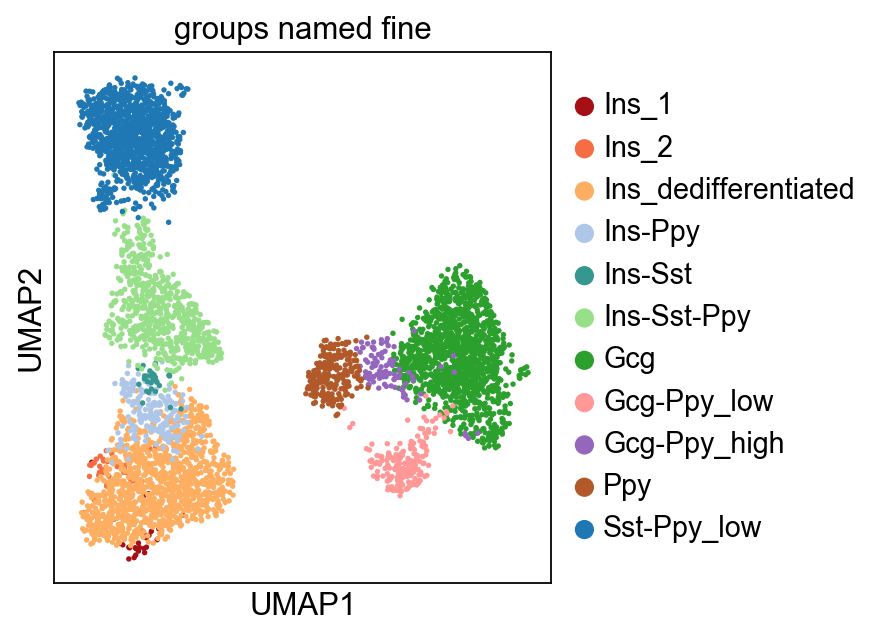

In [313]:
treat='Vehicle-STZ'
ix=np.isin(adata_endo_hvg.obs['treatment'],[treat])
adata_sub_hvg_endo=adata_endo_hvg[ix].copy()
adata_sub_hvg_endo.uns['groups_named_fine_colors']=cols_stz
sc.pp.pca(adata_sub_hvg_endo)
sc.pp.neighbors(adata_sub_hvg_endo)
sc.tl.paga(adata_sub_hvg_endo,groups='groups_named_fine')
sc.pl.paga(adata_sub_hvg_endo,pos=pos,frameon=False,labels=labels_stz,save='_'+treat+'.pdf')

sc.tl.umap(adata_sub_hvg_endo,init_pos='paga',min_dist=0.8)
sc.pl.umap(adata_sub_hvg_endo,color=['groups_named_fine'],save='_'+treat+'.pdf')
adata_sub_hvg_endo.write('.write/endo_'+treat+'.h5ad')

Graph has more than a single connected component. To restrict to this component, pass `single_component=True`.
--> added 'pos', the PAGA positions (adata.uns['paga'])
saving figure to file /Users/sophie/Documents/ICB/Projects/2018_10X_Glp_Est_Mice/Analysis_vers_1_0/final_figures_paper/paga_thr05_Vehicle-STZ.pdf


/Users/sophie/miniconda3/lib/python3.5/site-packages/scipy/sparse/compressed.py:274: SparseEfficiencyWarning: Comparing a sparse matrix with a scalar greater than zero using < is inefficient, try using >= instead.
  warn(bad_scalar_msg, SparseEfficiencyWarning)


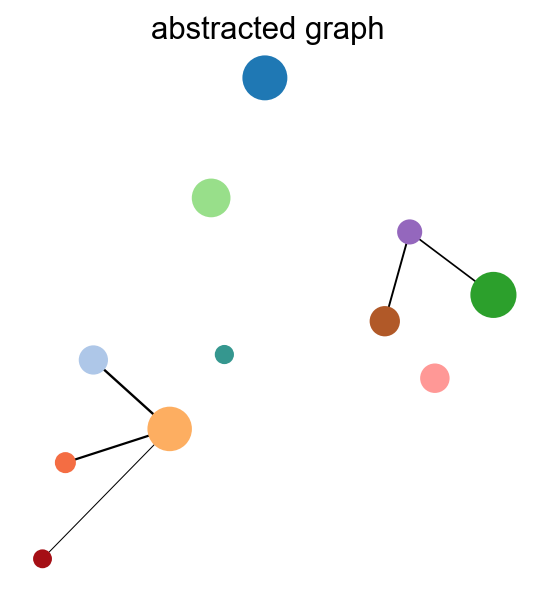

In [324]:
treat='Vehicle-STZ'
adata_sub_hvg_endo=sc.read('.write/endo_'+treat+'.h5ad')
sc.pl.paga(adata_sub_hvg_endo,pos=pos,threshold_solid=0.05,frameon=False,labels=labels_stz,save='_thr05_'+treat+'.pdf')

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:02.84) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix
running partition-based graph abstraction (PAGA)
    finished (0:00:00.14) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/confidence', confidence adjacency (adata.uns)
    'paga/confidence_tree', confidence subtree (adata.uns)
--> added 'pos', the PAGA positions (adata.uns['paga'])
saving figure to file /Users/sophie/Documents/ICB/Projects/2018_10X_Glp_Est_Mice/Analysis_vers_1_0/final_figures_paper/paga_Ctrl.pdf


/Users/sophie/miniconda3/lib/python3.5/site-packages/scipy/sparse/compressed.py:274: SparseEfficiencyWarning: Comparing a sparse matrix with a scalar greater than zero using < is inefficient, try using >= instead.
  warn(bad_scalar_msg, SparseEfficiencyWarning)


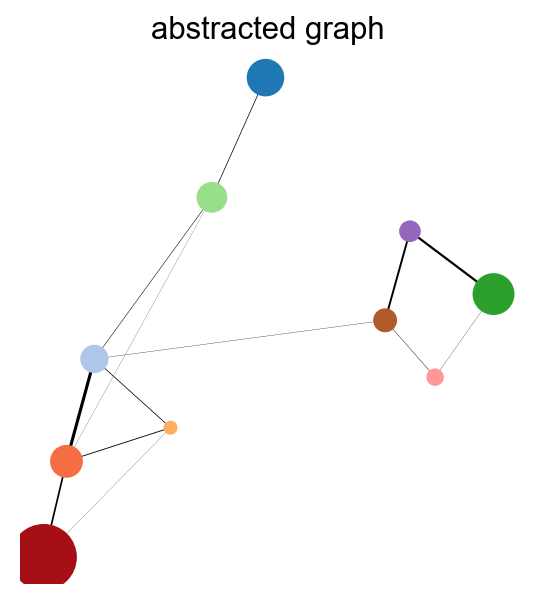

computing UMAP
    finished (0:00:13.78) --> added
    'X_umap', UMAP coordinates (adata.obsm)
saving figure to file /Users/sophie/Documents/ICB/Projects/2018_10X_Glp_Est_Mice/Analysis_vers_1_0/final_figures_paper/umap_Ctrl.pdf


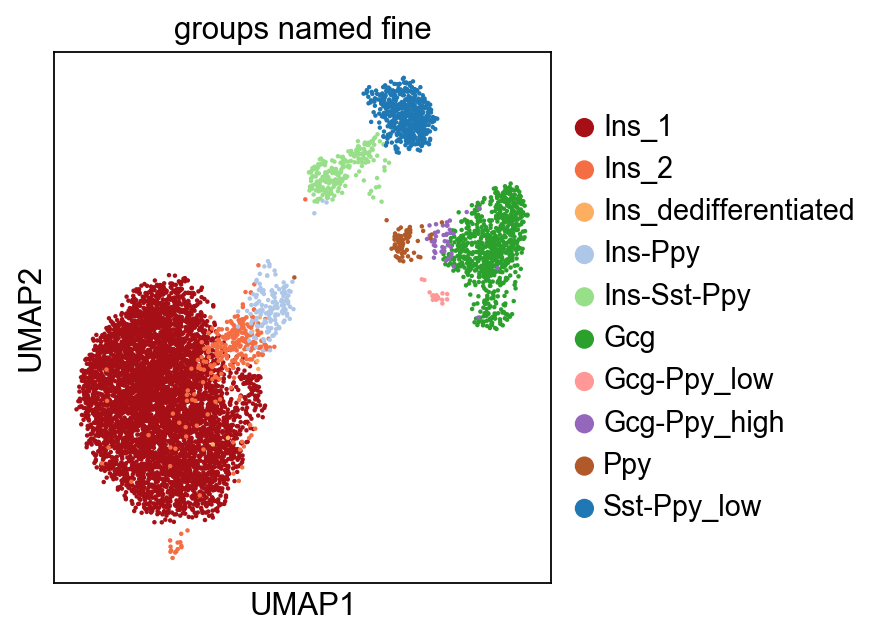

In [314]:
treat='Ctrl'
ix=np.isin(adata_endo_hvg.obs['treatment'],[treat])
adata_sub_hvg_endo=adata_endo_hvg[ix].copy()
adata_sub_hvg_endo.uns['groups_named_fine_colors']=cols_cd
sc.pp.pca(adata_sub_hvg_endo)
sc.pp.neighbors(adata_sub_hvg_endo)
sc.tl.paga(adata_sub_hvg_endo,groups='groups_named_fine')
sc.pl.paga(adata_sub_hvg_endo,pos=pos_cd,frameon=False,labels=labels_cd,save='_'+treat+'.pdf')
sc.tl.umap(adata_sub_hvg_endo,init_pos='paga',min_dist=0.8)
sc.pl.umap(adata_sub_hvg_endo,color=['groups_named_fine'],save='_'+treat+'.pdf')
adata_sub_hvg_endo.write('.write/endo_'+treat+'.h5ad')

# Beta cell redifferentiation

In [172]:
adata_sub_den=adata_endo_hvg[np.isin(adata_endo_hvg.obs['groups_named_broad'],'beta')].copy()

## Embedding and UMAP

In [173]:
adata_sub=adata_endo_all[np.isin(adata_endo_all.obs['groups_named_broad'],'beta')].copy()
sc.pp.neighbors(adata_sub_den)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:05.67) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix


In [175]:
pos=-np.array([[-4.7695372936, 0],
       [ 4.5924365399,  -1.9629544302],
       [ 5.7912066908,  -0.7356557891],
       [ 5.7762835002,  -1.4039826379],
       [ 2.4174861409,  -2.1372517015],
       [-1.7590285696,  -0.8835662361],
       [-0.9095923972,  -2.8420351906]])

running partition-based graph abstraction (PAGA)
    finished (0:00:00.28) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/confidence', confidence adjacency (adata.uns)
    'paga/confidence_tree', confidence subtree (adata.uns)
--> added 'pos', the PAGA positions (adata.uns['paga'])


/Users/sophie/miniconda3/lib/python3.5/site-packages/scipy/sparse/compressed.py:274: SparseEfficiencyWarning: Comparing a sparse matrix with a scalar greater than zero using < is inefficient, try using >= instead.
  warn(bad_scalar_msg, SparseEfficiencyWarning)


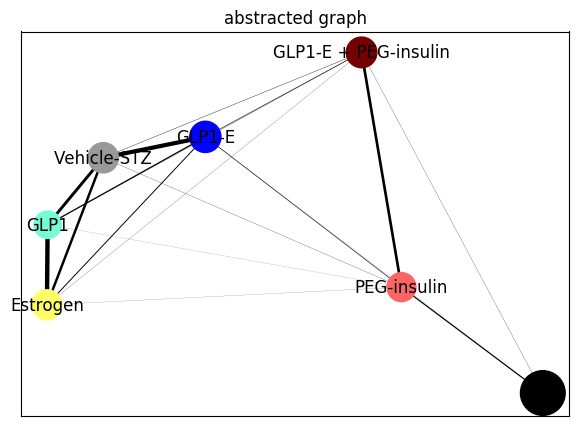

In [176]:
sc.tl.paga(adata_sub_den,groups='treatment')
sc.pl.paga(adata_sub_den,node_size_scale=3,fontsize=12,pos=pos)

In [177]:
sc.tl.umap(adata_sub_den,min_dist=0.4,init_pos='paga')

computing UMAP
    finished (0:00:08.45) --> added
    'X_umap', UMAP coordinates (adata.obsm)


## Cell-to-cell distance of beta cells across treatments 

In [199]:
adata_sub_den.uns['iroot'] = np.flatnonzero(np.array([all(tup) for tup in 
                                                       zip(adata_sub_den.obs['groups_named_fine'] == 'Ins_dedifferentiated',
                                                           (adata_sub_den[:,'Aldh1a3'].X>1.5),(adata_sub_den[:,'Aldob'].X<0.1),
                                                          (adata_sub_den[:,'Cck'].X>1.5))]))[2]
sc.tl.dpt(adata_sub_den)
adata_sub.obs['dpt_pseudotime']=adata_sub_den.obs['dpt_pseudotime']


performing Diffusion Pseudotime analysis
    eigenvalues of transition matrix
    [1.         0.9921209  0.97233343 0.9569541  0.9541271  0.9428234
     0.93953305 0.935723   0.9289736  0.922561  ]
    finished (0:00:00.40) --> added
    'dpt_pseudotime', the pseudotime (adata.obs)


In [68]:
sc.tl.diffmap(adata_sub_den)

computing Diffusion Maps
    eigenvalues of transition matrix
    [1.         0.9921209  0.97233343 0.9569541  0.9541271  0.9428234
     0.93953305 0.935723   0.9289736  0.922561   0.9188292  0.9131694
     0.9007266  0.8954714  0.8905164 ]
    finished (0:00:00.54) --> added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns)


In [180]:

sc.tl.dpt(adata_sub_den)

performing Diffusion Pseudotime analysis
    eigenvalues of transition matrix
    [1.         0.9921209  0.97233343 0.9569541  0.9541271  0.9428234
     0.93953305 0.935723   0.9289736  0.922561  ]
    finished (0:00:00.41) --> added
    'dpt_pseudotime', the pseudotime (adata.obs)


In [925]:
adata_sub_den.write('.write/beta_all_hvg.h5ad')
adata_sub.write('.write/beta_all.h5ad')

In [200]:
adata_sub.obsm['X_diffmap']=adata_sub_den.obsm['X_diffmap']
adata_sub.obsm['X_umap']=adata_sub_den.obsm['X_umap']
adata_sub.obs['dpt_pseudotime']=adata_sub_den.obs['dpt_pseudotime']

In [632]:
sc.set_figure_params(vector_friendly=True,color_map='RdBu_r',dpi_save=300,transparent=False)
rcParams['figure.figsize'] = (6, 4.5)


saving figure to file /Users/sophie/Documents/ICB/Projects/2018_10X_Glp_Est_Mice/Analysis_vers_1_0/figures_paper/umap_cluster.pdf


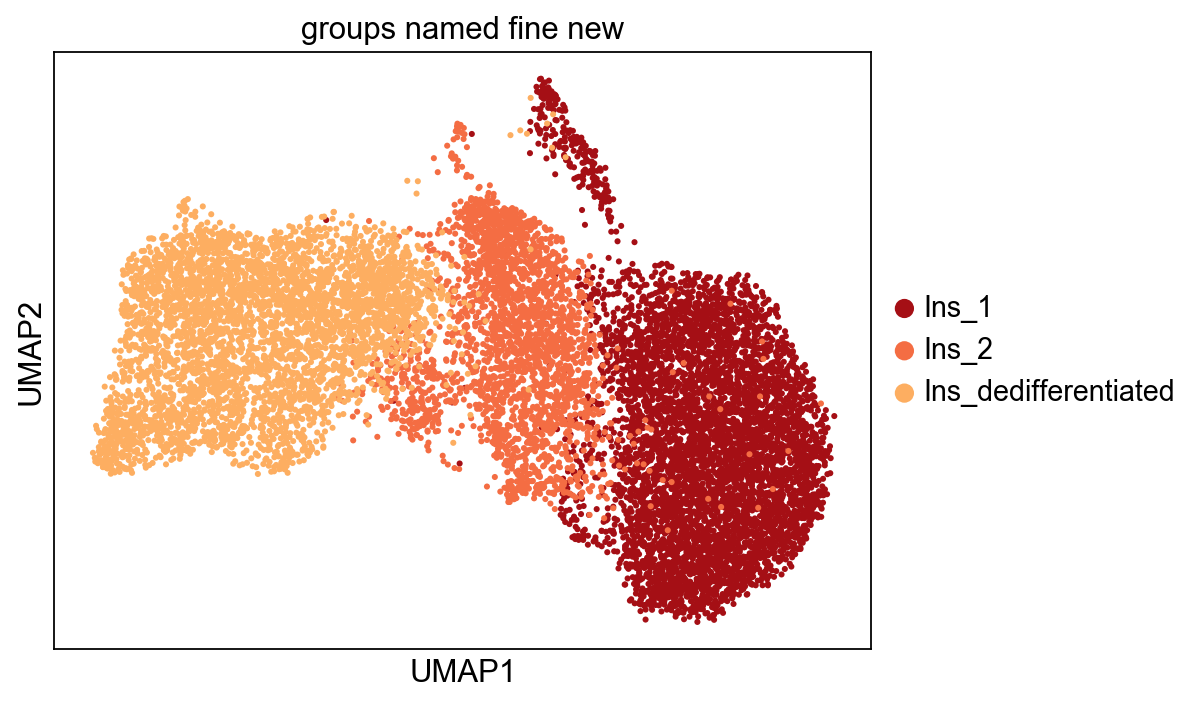

saving figure to file /Users/sophie/Documents/ICB/Projects/2018_10X_Glp_Est_Mice/Analysis_vers_1_0/figures_paper/umap_treatment.pdf


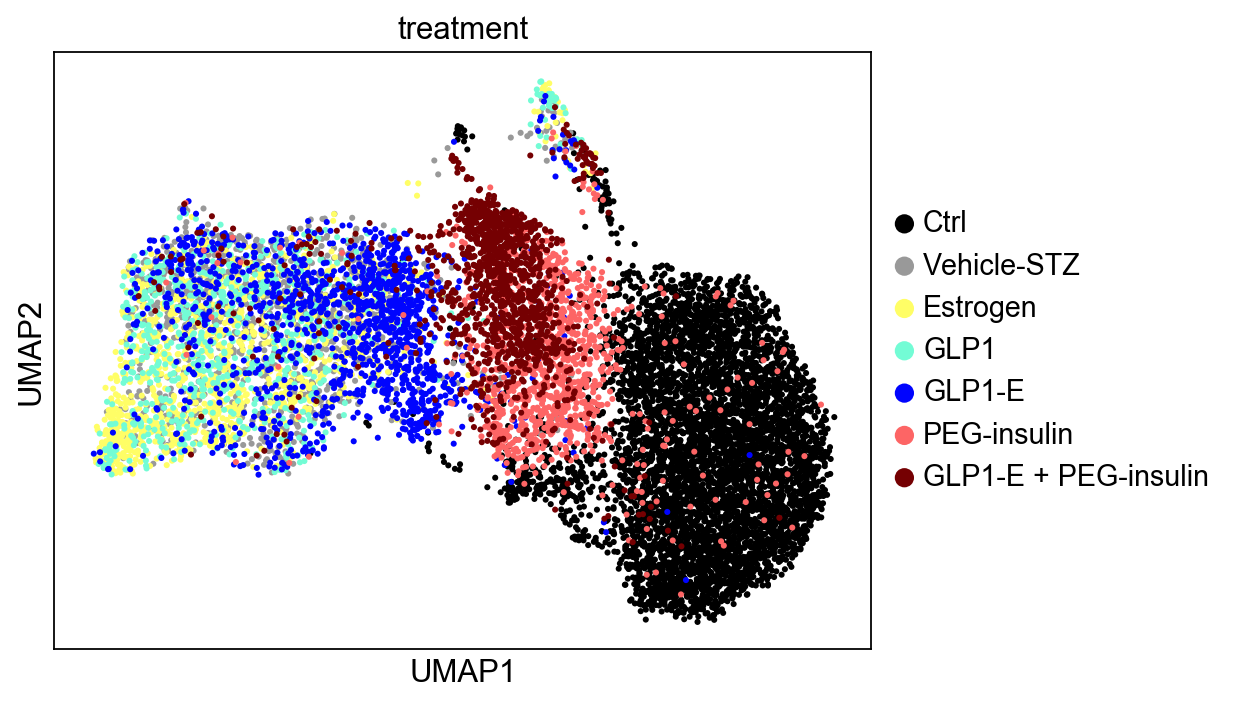

saving figure to file /Users/sophie/Documents/ICB/Projects/2018_10X_Glp_Est_Mice/Analysis_vers_1_0/figures_paper/umap_dpt.pdf


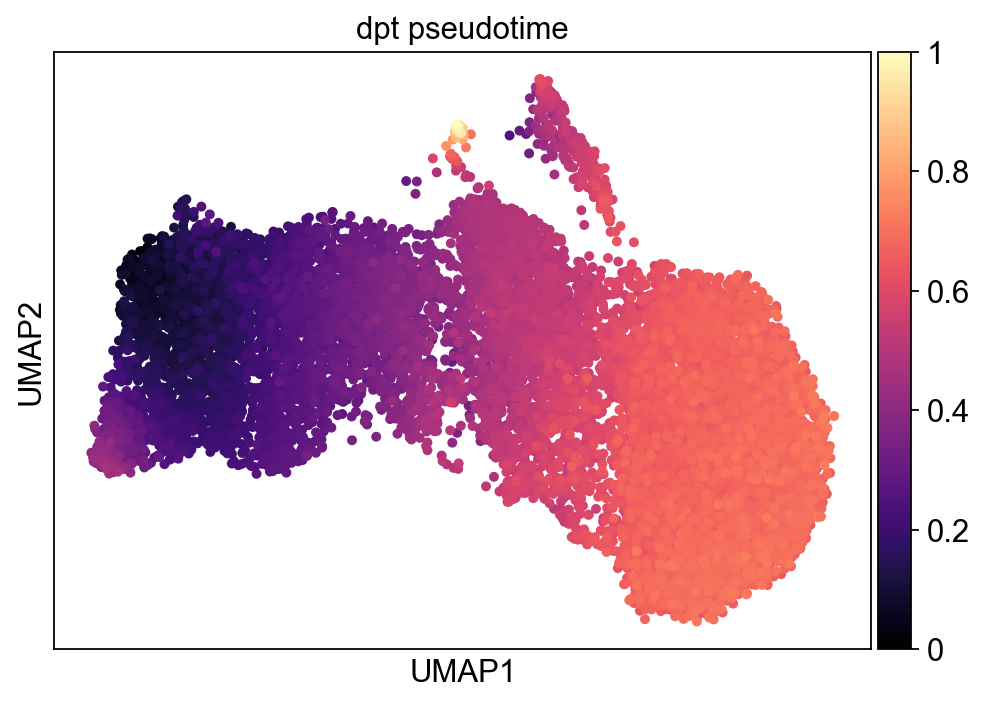

In [988]:
sc.pl.umap(adata_sub,color=['groups_named_fine'],size=30,color_map='magma',save='_cluster.pdf')
sc.pl.umap(adata_sub,color=['treatment'],size=30,color_map='magma',save='_treatment.pdf')

sc.pl.umap(adata_sub,color=['dpt_pseudotime'],size=80,color_map='magma',save='_dpt.pdf')


### Density along cell-to-cell distance

In [182]:
adata_endo_all.uns['treatment_colors_rgb']=['000','153153153','#fffe66', '#73fcd5', '#0004fe', '#fd6565',
       '#750002']

In [201]:
adata_sub.obs['groups_named_beta_dpt']=adata_sub_den.obs['groups_named_beta_dpt']

In [202]:
adata_sub_dpt=adata_sub_den[np.isin(adata_sub_den.obs['groups_named_beta_dpt'],['Ins_1','Ins_2','Ins_dedifferentiated'])].copy()
adata_sub_dpt_all=adata_sub[np.isin(adata_sub.obs['groups_named_beta_dpt'],['Ins_1','Ins_2','Ins_dedifferentiated'])].copy()

In [203]:
adata_sub_dpt=adata_sub_dpt[np.isin(adata_sub_dpt.obs['proliferation_man'],'Non-Cycling')].copy()
adata_sub_dpt_all=adata_sub_dpt_all[np.isin(adata_sub_dpt.obs['proliferation_man'],'Non-Cycling')].copy()

In [204]:
df=adata_sub_dpt.obs[np.isin(adata_sub_dpt.obs['proliferation_man'],'Non-Cycling')]

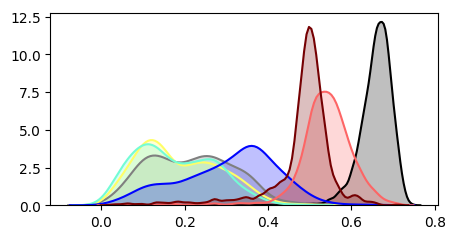

In [205]:
rcParams['figure.figsize'] = (5, 2.5)
fig,ax=pl.subplots()
for i,treat in enumerate(adata_endo_all.obs['treatment'].cat.categories):
    df_sub=df[np.isin(df['treatment'],treat)]
    sns.kdeplot(df_sub['dpt_pseudotime'],ax=ax,color=adata_endo_all.uns['treatment_colors_rgb'][i],legend=False,shade=True)
pl.savefig('./figures_paper/Figbeta_treat_density.pdf',format='pdf')
pl.show()

pl.rcParams.update(pl.rcParamsDefault)


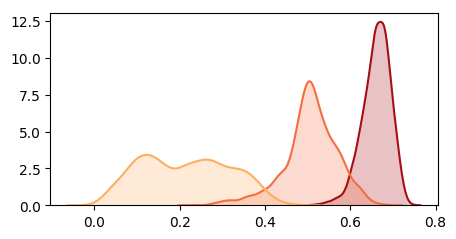

In [206]:
rcParams['figure.figsize'] = (5, 2.5)

fig,ax=pl.subplots()
cols=['#a50f15',
 '#f46d43',
 '#fdae61',]

for i,treat in enumerate(['Ins_1','Ins_2','Ins_dedifferentiated']):
    df_sub=df[np.isin(df['groups_named_fine'],treat)]
    sns.kdeplot(df_sub['dpt_pseudotime'],ax=ax,color=cols[i],legend=False,shade=True)
pl.savefig('./figures_paper/Figbeta_cluster_density.pdf',format='pdf')

pl.show()

pl.rcParams.update(pl.rcParamsDefault)


### Gene expression along cell-to-cell distance

In [ ]:
from xlrd import XLRDError
xls = pd.ExcelFile('/Users/sophie/Documents/ICB/Projects/2018_10X_Glp_Est_Mice/DEG_Quantile_norm/Quantile_Final_Normalized_Ctrl_Vehicle-STZ_limma_deg_broad_all.xlsx')

In [397]:

ix=[a and b for a,b in zip(pd.read_excel(xls, 'beta',index_col=0)['logFC'].values>0.25,pd.read_excel(xls, 'beta',index_col=0)['adj.P.Val'].values<0.01)]
df=pd.read_excel(xls, 'beta',index_col=0)[ix]
genes_up = df.sort_values(by='logFC',ascending=False).index[0:200]
ix=[a and b for a,b in zip(pd.read_excel(xls, 'beta',index_col=0)['logFC'].values<-0.25,pd.read_excel(xls, 'beta',index_col=0)['adj.P.Val'].values<0.01)]
df=pd.read_excel(xls, 'beta',index_col=0)[ix]
genes_down = df.sort_values(by='logFC',ascending=True).index[0:200]


In [398]:
genes_down=genes_down[np.invert(np.isin(genes_down,['Gcg','Sst','Ppy','Pyy','Ctrb1','Ttr','Try5','Gpx3']))]
genes_up=genes_up[np.invert(np.isin(genes_down,['Ins1','Ins2','Iapp']))]

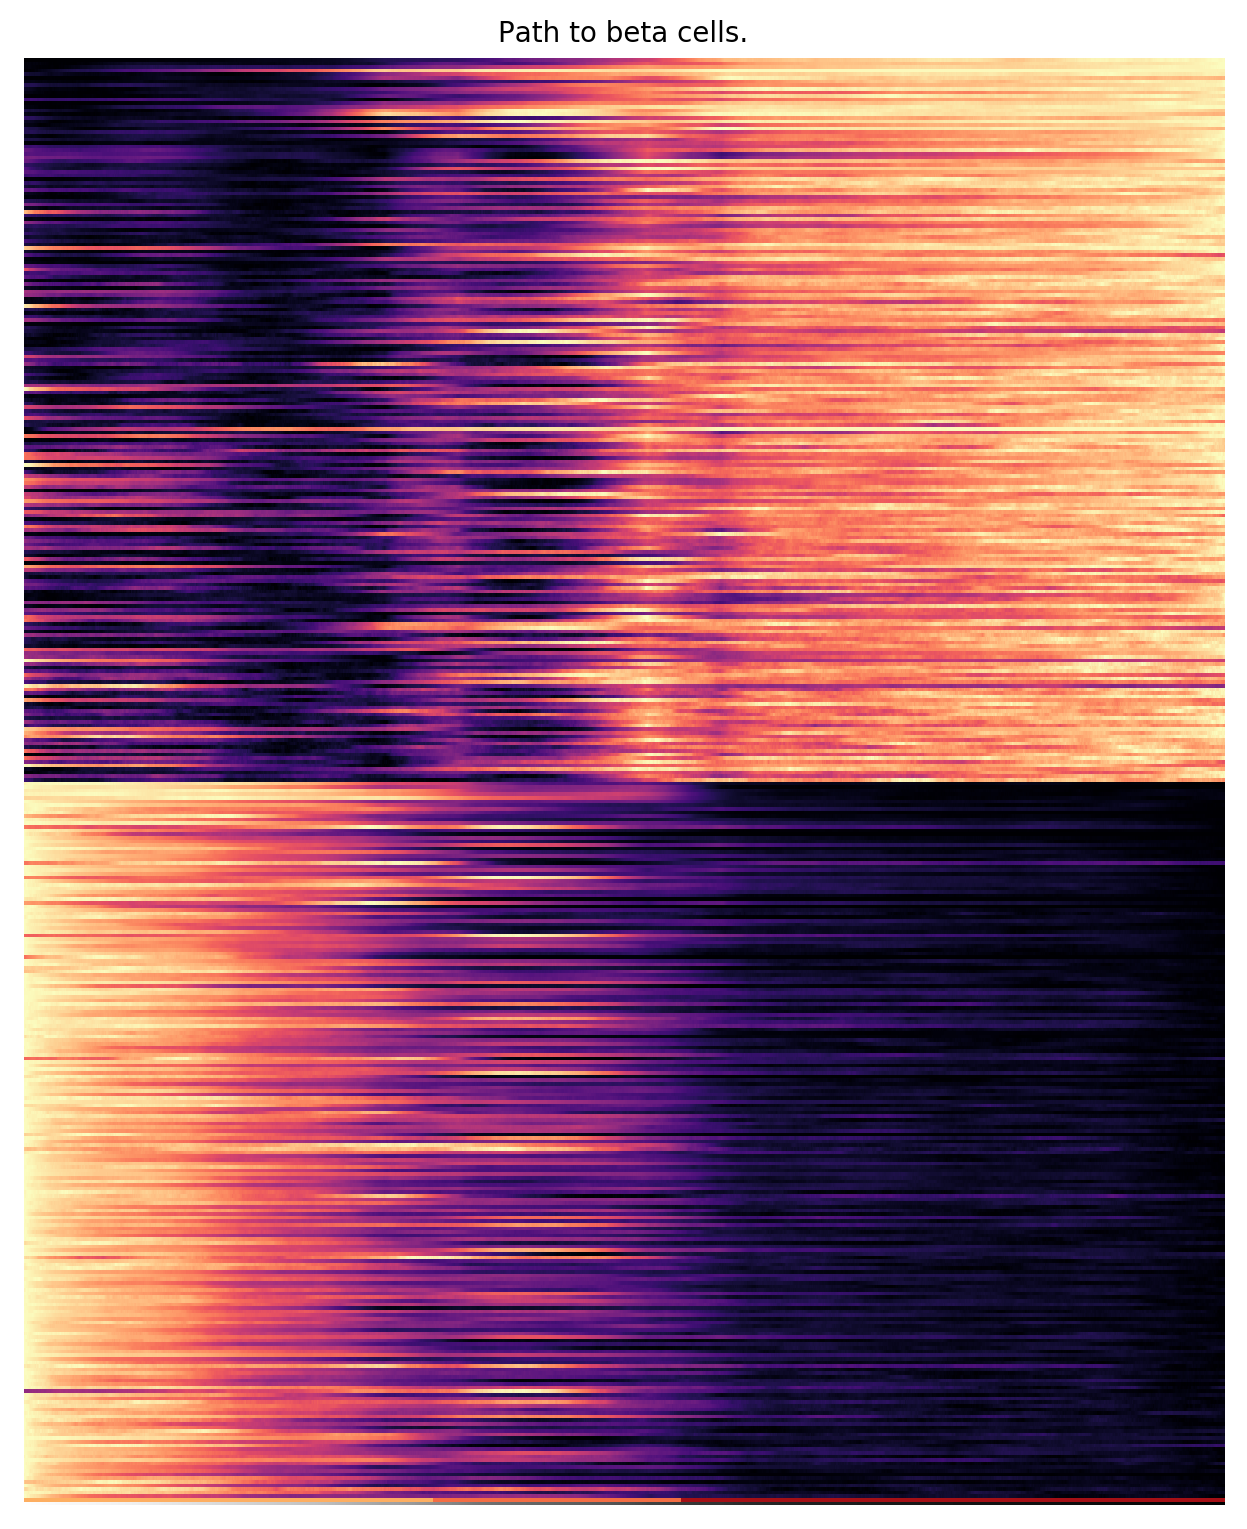

In [399]:
genes=list(genes_down)+list(genes_up)


paths = [('beta cells', ['Ins_dedifferentiated','Ins_2','Ins_1'])]
         
         #('Goblet', ['1,0,0,0','9,0,1,0','4,0,0,0','2,0,0,0','7,0,0,0']),
         #('EEC', ['1,0,0,0','11,0,0,2','9,0,2,0','5,0,0,0','11,0,0,3','11,0,0,1'])]



rcParams['figure.figsize'] = (10, 10)
rcParams['figure.subplot.top'] = 0.85
rcParams['figure.subplot.bottom'] = 0.13
for ipath, (descr, path) in enumerate(paths):

        ax,data= sc.pl.paga_path(adata_sub_dpt_all, left_margin=0.3,color_map='magma',groups_key='groups_named_beta_dpt',use_raw=True,show_yticks=False,return_data=True,
                        show_colorbar=False,
                        show_node_names=False,
    #                         color_maps_annotations={'cellcycle_colors':adata_endo_all.uns['cellcycle_colors']},
                        nodes=path,
                        ytick_fontsize=12,
                        keys=genes,
                    
                        n_avg=700,
                        title='Path to {}.'.format(descr),
                        normalize_to_zero_one=True, show=False)

        #pl.savefig('/Users/sophie/Documents/ICB/Projects/2018_10X_Glp_Est_Mice/Analysis_vers_1_0/figures_paper/Figbeta_dpt.pdf',format='pdf')
        pl.show()





pl.rcParams.update(pl.rcParamsDefault)


In [400]:
rowix=data.idxmax(axis=0)
rowix=rowix[0:data.shape[1]-2]
dpt=pd.DataFrame(data['distance'][rowix].values,index=data.columns[0:data.shape[1]-2])
dpt=dpt.sort_values(by=0,ascending=True)

dpt_down=dpt.loc[genes_down]
dpt_down=dpt_down.sort_values(by=0,ascending=True)

dpt_up=dpt.loc[genes_up]
dpt_up=dpt_up.sort_values(by=0,ascending=True)





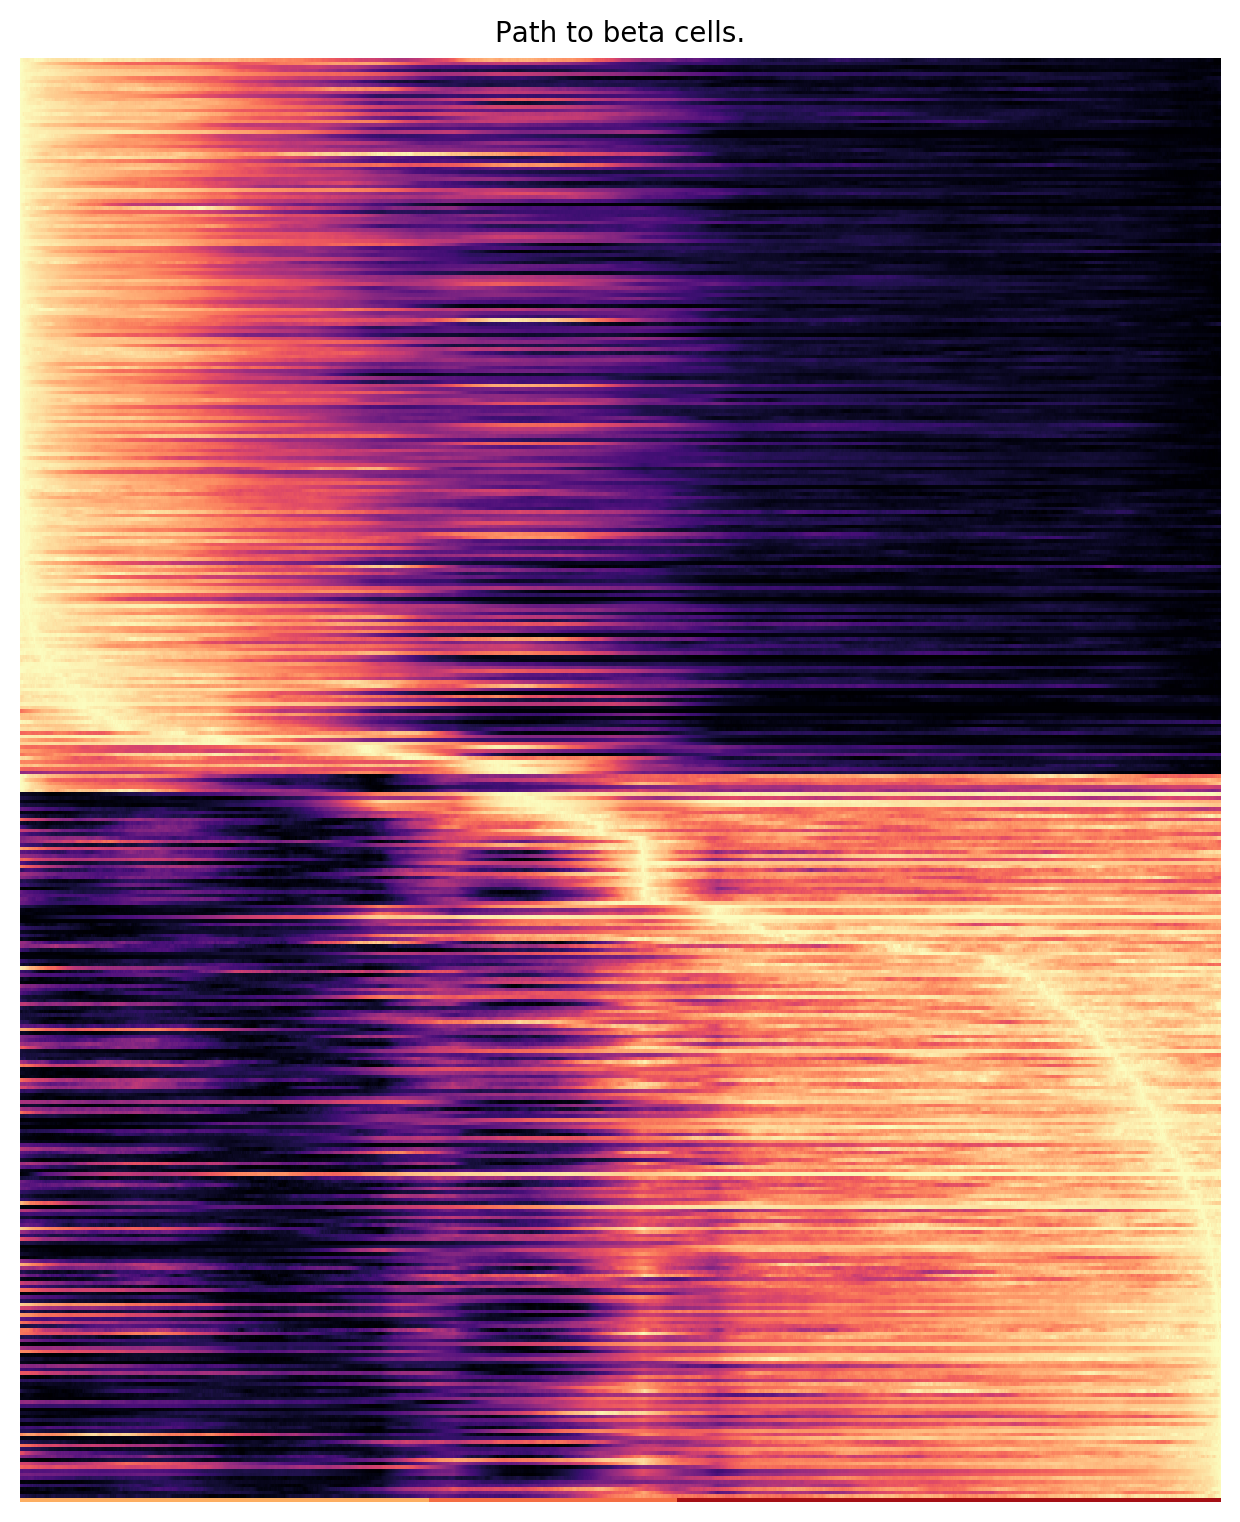

In [401]:
genes=list(dpt_up.index)+list(dpt_down.index)


paths = [('beta cells', ['Ins_dedifferentiated','Ins_2','Ins_1'])]
         
         #('Goblet', ['1,0,0,0','9,0,1,0','4,0,0,0','2,0,0,0','7,0,0,0']),
         #('EEC', ['1,0,0,0','11,0,0,2','9,0,2,0','5,0,0,0','11,0,0,3','11,0,0,1'])]



rcParams['figure.figsize'] = (10, 10)
rcParams['figure.subplot.top'] = 0.85
rcParams['figure.subplot.bottom'] = 0.13
for ipath, (descr, path) in enumerate(paths):

        sc.pl.paga_path(adata_sub_dpt_all, left_margin=0.3,color_map='magma',groups_key='groups_named_beta_dpt',use_raw=True,show_yticks=False,
                        show_colorbar=False,
                                
                        annotations=[],show_node_names=False,
    #                         color_maps_annotations={'cellcycle_colors':adata_endo_all.uns['cellcycle_colors']},
                        nodes=path,
                        ytick_fontsize=4,
                        keys=genes,
                    
                        n_avg=700,
                        title='Path to {}.'.format(descr),
                        normalize_to_zero_one=True, show=False)

        pl.savefig('/Users/sophie/Documents/ICB/Projects/2018_10X_Glp_Est_Mice/Analysis_vers_1_0/figures_paper/Figbeta_dpt_gene.pdf',format='pdf')
        pl.show()





pl.rcParams.update(pl.rcParamsDefault)


In [233]:

from matplotlib.colors import ListedColormap, BoundaryNorm
treat_col=ListedColormap(adata_denoised.uns['treatment_colors'])



plot the annotation

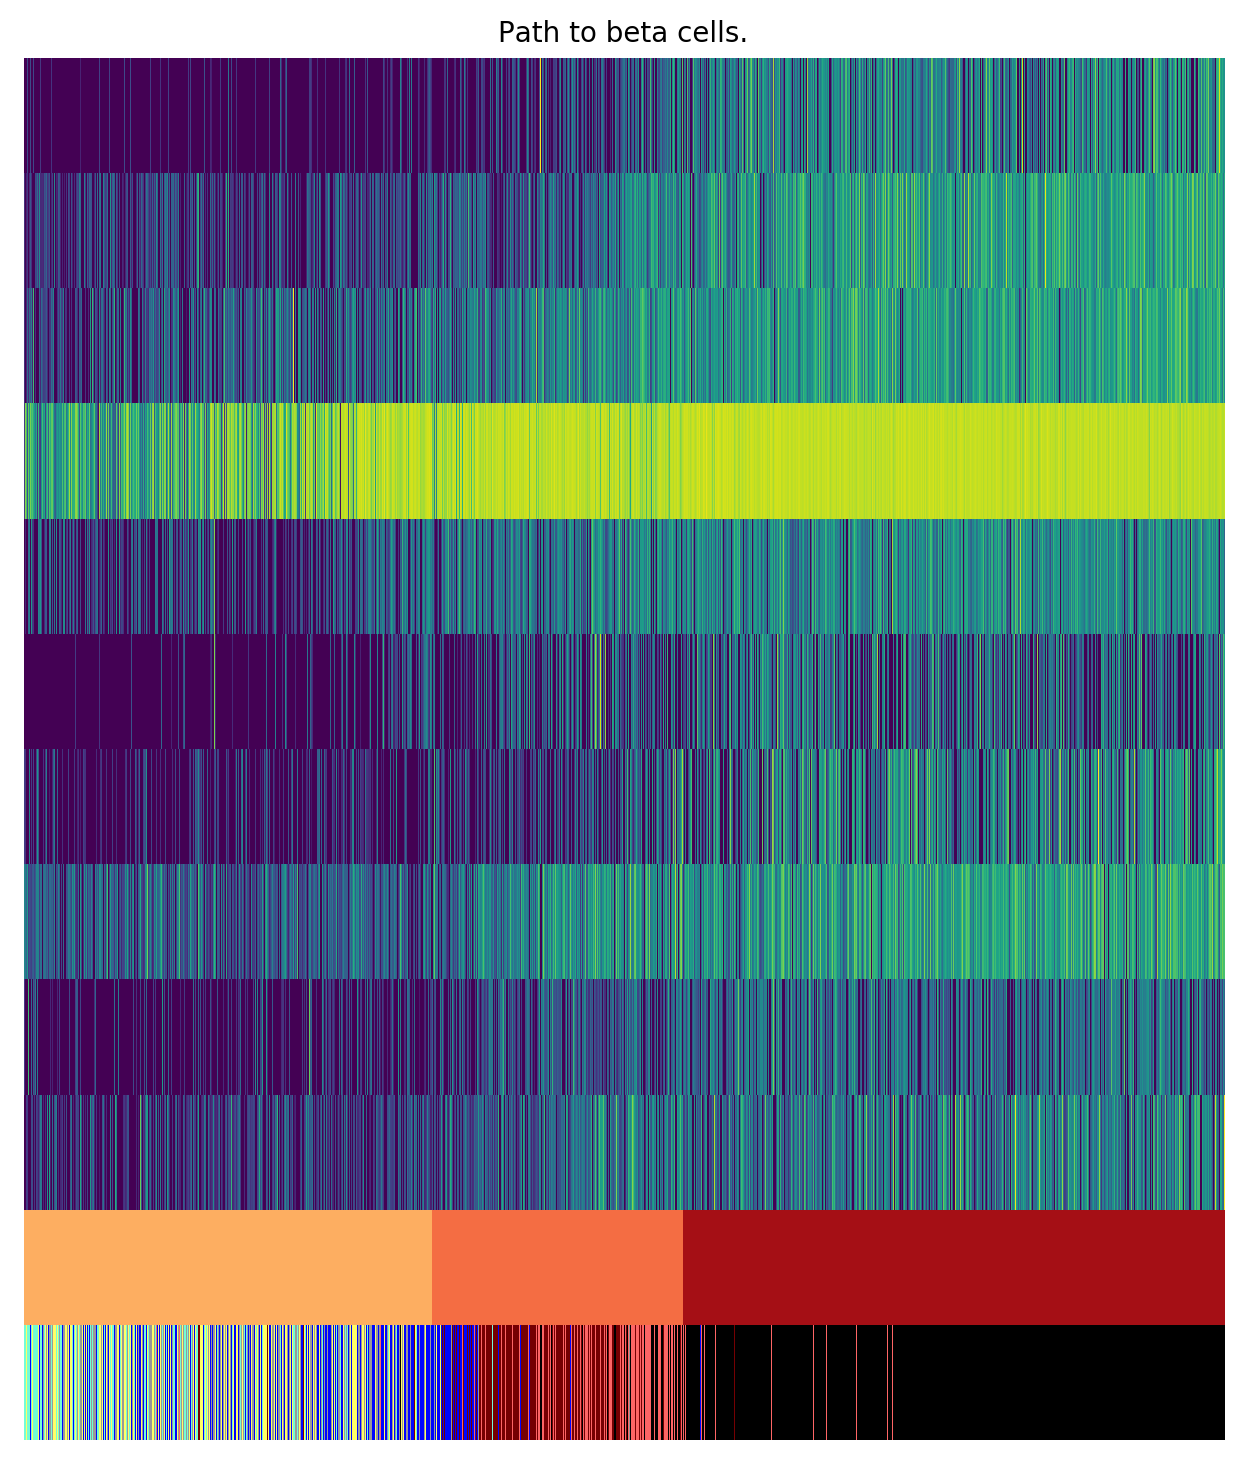

In [237]:
genes=list(genes_down)+list(genes_up)
genes=genes[0:10]

paths = [('beta cells', ['Ins_dedifferentiated','Ins_2','Ins_1'])]
         
         #('Goblet', ['1,0,0,0','9,0,1,0','4,0,0,0','2,0,0,0','7,0,0,0']),
         #('EEC', ['1,0,0,0','11,0,0,2','9,0,2,0','5,0,0,0','11,0,0,3','11,0,0,1'])]



rcParams['figure.figsize'] = (10, 8)
rcParams['figure.subplot.top'] = 0.85
rcParams['figure.subplot.bottom'] = 0.13
for ipath, (descr, path) in enumerate(paths):

        sc.pl.paga_path(adata_sub, left_margin=0.3,color_map='viridis',groups_key='groups_named_beta_dpt',use_raw=True,show_yticks=False,
                        show_colorbar=False,annotations=['treatment'],
                        color_maps_annotations={'treatment':treat_col},
                                
                        show_node_names=False,
    #                         color_maps_annotations={'cellcycle_colors':adata_endo_all.uns['cellcycle_colors']},
                        nodes=path,
                        ytick_fontsize=12,
                        keys=genes,
                    
                        n_avg=1,
                        title='Path to {}.'.format(descr),
                        normalize_to_zero_one=True, show=False)

        pl.savefig('./figures_paper/Figbeta_dpt_annot.pdf',format='pdf')
        pl.show()





pl.rcParams.update(pl.rcParamsDefault)


### Gene expression changes along cell-to-cell distance (polynominal regression fits)

In [222]:
genes=['Nkx6-1','Ucn3','Mafb','Aldh1a3','Cck','Gast','Slc2a2','Aqp4']
df=pd.DataFrame(adata_sub[:,genes].copy().X.toarray(),columns=genes)[np.isin(adata_sub.obs['proliferation_man'],'Non-Cycling')]
df['pseudotime']=adata_sub.obs['dpt_pseudotime'].values[np.isin(adata_sub.obs['proliferation_man'],'Non-Cycling')]
df['treatment']=adata_sub.obs['treatment'].values[np.isin(adata_sub.obs['proliferation_man'],'Non-Cycling')]
df=df.sort_values(by='pseudotime',ascending=True)

In [223]:
range(3,df.shape[0])

range(3, 12353)

In [226]:
df=df.iloc[3:12352]

In [ ]:
genes=['Nkx6-1','Ucn3','Aldh1a3','Cck','Gast','Slc2a2',]
rcParams['figure.figsize'] = (4, 2)

for gene in genes:
    #x_stats_1=stats.binned_statistic(df['pseudotime'].values, df[gene].values, 'mean', bins=10,range=(0,0.75))
    fit=np.polyfit(df['pseudotime'].values,df[gene].values,deg=3)
    f = np.poly1d(fit)

    #ax = sns.lineplot(y=x_stats_1.statistic, x=x_stats_1.bin_edges[0:len(x_stats_1.statistic)],color='red')
    ax= sns.lineplot(y=f(df['pseudotime']), x=df['pseudotime'].values,color='red')
    sns.scatterplot(x=df['pseudotime'],y=df[gene],ax=ax,s=3,hue=df['treatment'],edgecolor='',palette=adata_sub_den.uns['treatment_colors'],rasterized=True)
    ax.get_legend().remove()
    pl.savefig('./figures_paper/Figbeta_lineplot_'+gene+'.pdf',format='pdf',dpi=300)
    pl.show()

### Transcriptomic similarity of beta cells using PAGA

exporting label positions to ./write/pos.csv


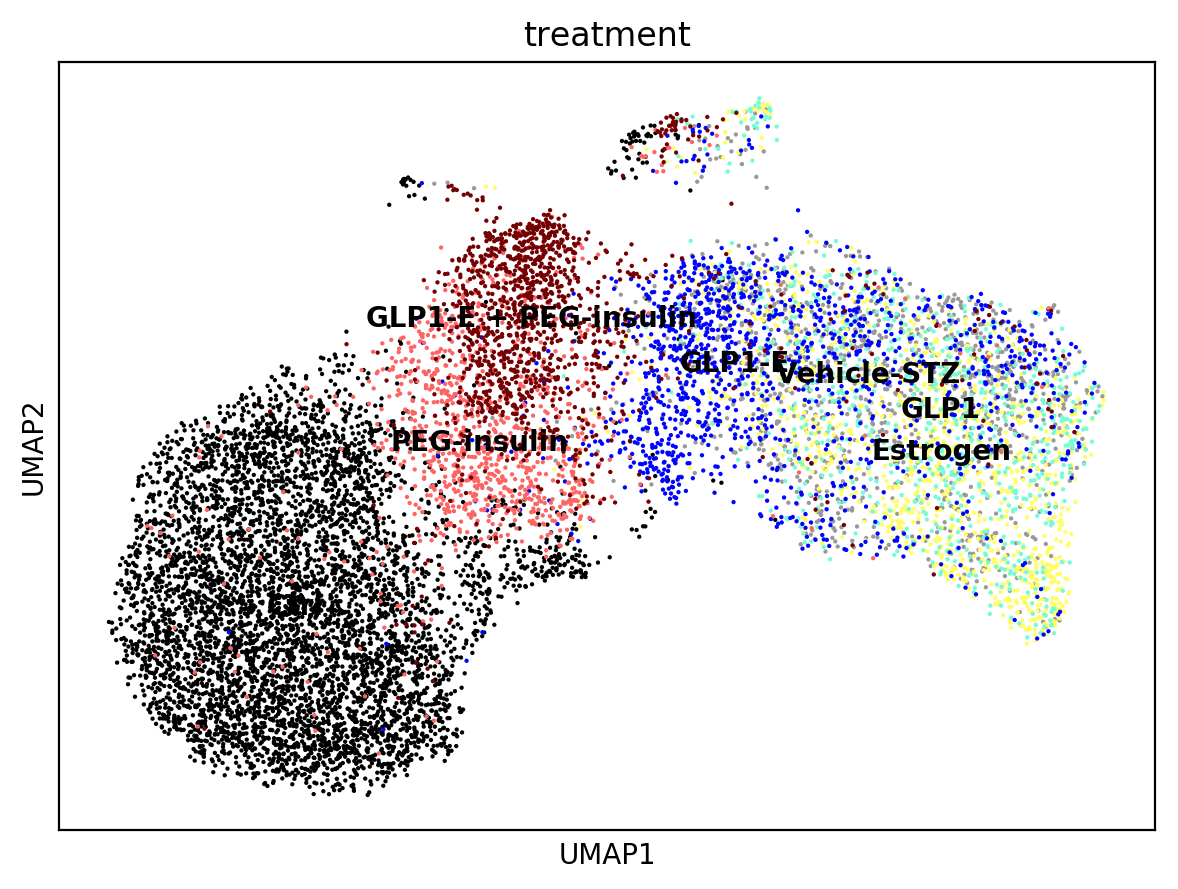

In [943]:
sc.set_figure_params(vector_friendly=True,color_map='RdBu_r',dpi_save=300,transparent=True)
pl.rcParams.update(pl.rcParamsDefault)
sc.pl.umap(adata_sub_den,color='treatment',legend_loc='on data export')

In [940]:
sc.pp.pca(adata_sub_dpt)
sc.pp.neighbors(adata_sub_dpt)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:05.18) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix


In [970]:
pos=np.array([[3.7562814927, -2.1],
       [ -4.4,  -2.7],
       [ -4.4,  -1.5],
       [ -5.0219901452,  -2],
       [ -2.5670844755,  -2.1],
       [1.1958937959,  -1.5],
       [0.5357617506,  -2.976604155 ]])

running partition-based graph abstraction (PAGA)
    finished (0:00:00.23) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/confidence', confidence adjacency (adata.uns)
    'paga/confidence_tree', confidence subtree (adata.uns)
--> added 'pos', the PAGA positions (adata.uns['paga'])
saving figure to file /Users/sophie/Documents/ICB/Projects/2018_10X_Glp_Est_Mice/Analysis_vers_1_0/figures_paper/paga_beta.pdf


/Users/sophie/miniconda3/lib/python3.5/site-packages/scipy/sparse/compressed.py:274: SparseEfficiencyWarning: Comparing a sparse matrix with a scalar greater than zero using < is inefficient, try using >= instead.
  warn(bad_scalar_msg, SparseEfficiencyWarning)


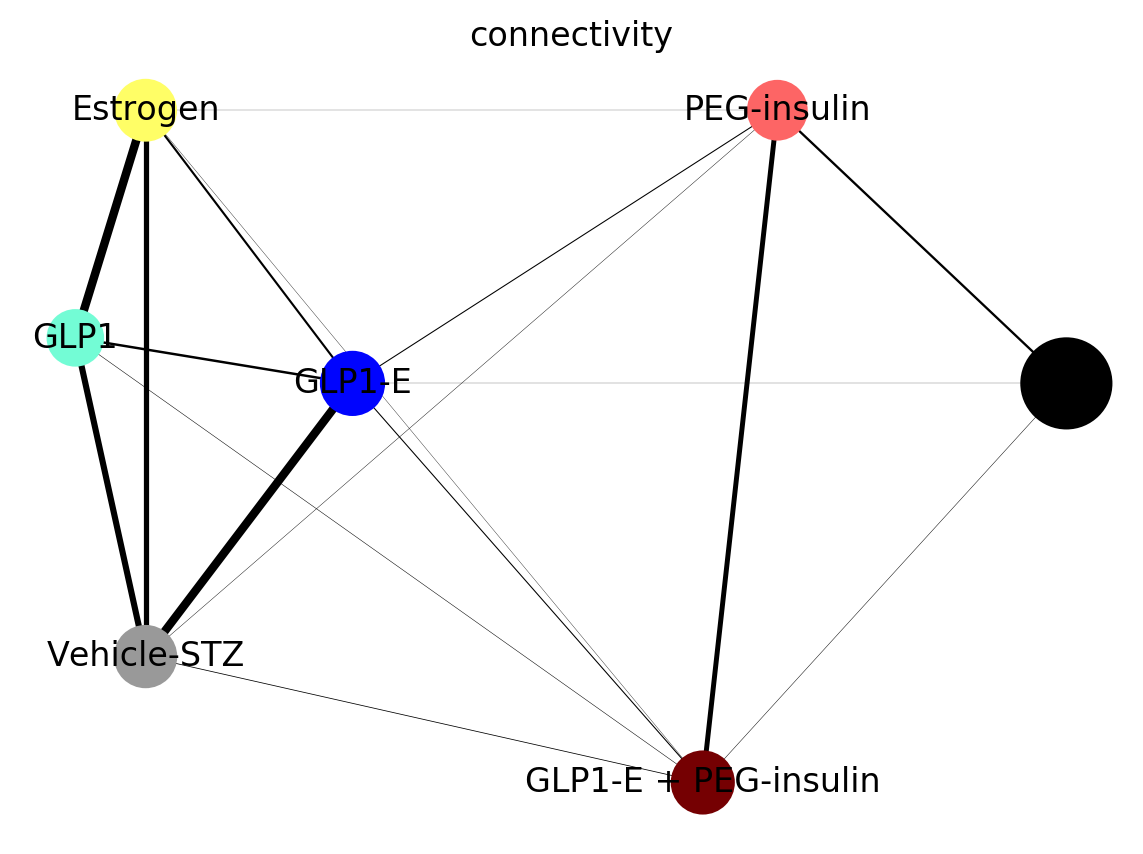

In [973]:
sc.tl.paga(adata_sub_dpt,groups='treatment')
sc.pl.paga(adata_sub_dpt,pos=pos,save='_beta.pdf',node_size_scale=3,fontsize=12,frameon=False,title='connectivity')